# 1. Data Analysis

### Joining Application Train, Credit Card Balance and Bureau Sheets

In [105]:

from pandas import *
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
 
bureaudata = pd.read_csv("C:\\Users\\khann\\Desktop\\Python Assignments\\home-credit-default-risk\\bureau.csv")
applicationdata = pd.read_csv("C:\\Users\\khann\\Desktop\\Python Assignments\\home-credit-default-risk\\application_train.csv")
creditcardbalance = pd.read_csv("C:\\Users\\khann\\Desktop\\Python Assignments\\home-credit-default-risk\\credit_card_balance.csv")
bureaucreditdata = bureaudata.groupby(['SK_ID_CURR'], as_index=False)['AMT_CREDIT_SUM','AMT_CREDIT_SUM_DEBT','AMT_CREDIT_SUM_OVERDUE','CREDIT_DAY_OVERDUE','AMT_CREDIT_SUM_LIMIT','AMT_ANNUITY'].sum()
app_bureau_data=pd.merge(applicationdata,bureaucreditdata,on='SK_ID_CURR',how='left')
creditcarddata = creditcardbalance.groupby(['SK_ID_CURR'], as_index=False)['AMT_BALANCE','AMT_INST_MIN_REGULARITY'].sum()
app_bureau_credit_data = pd.merge(app_bureau_data,creditcarddata,on='SK_ID_CURR',how='left')
app_bureau_credit_data_wnull=app_bureau_credit_data
app_bureau_credit_data.head(2)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,...,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_OVERDUE,CREDIT_DAY_OVERDUE,AMT_CREDIT_SUM_LIMIT,AMT_ANNUITY_y,AMT_BALANCE,AMT_INST_MIN_REGULARITY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,1.0,865055.565,245781.0,0.0,0.0,31988.565,0.0,NaN,NaN
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,1017400.500,0.0,0.0,0.0,810000.000,0.0,NaN,NaN


## Numerical Data Distribution and Plots

In [190]:
#Corelation between features and target variables
list(set(app_bureau_credit_data.dtypes.tolist()))

[dtype('O'), dtype('int64'), dtype('float64')]

In [191]:
df_num = app_bureau_credit_data.select_dtypes(include = ['int64', 'float64'])
df_num.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_OVERDUE,CREDIT_DAY_OVERDUE,AMT_CREDIT_SUM_LIMIT,AMT_ANNUITY_y,AMT_BALANCE,AMT_INST_MIN_REGULARITY
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0.0,1.0,865055.565,245781.0,0.0,0.0,31988.565,0.0,NaN,NaN
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0.0,0.0,1017400.500,0.0,0.0,0.0,810000.000,0.0,NaN,NaN
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0.0,0.0,189037.800,0.0,0.0,0.0,0.000,0.0,NaN,NaN
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0.0,0.0,146250.000,0.0,0.0,0.0,0.000,0.0,NaN,NaN


array([[<AxesSubplot:title={'center':'SK_ID_CURR'}>,
        <AxesSubplot:title={'center':'TARGET'}>,
        <AxesSubplot:title={'center':'CNT_CHILDREN'}>,
        <AxesSubplot:title={'center':'AMT_INCOME_TOTAL'}>,
        <AxesSubplot:title={'center':'AMT_CREDIT'}>,
        <AxesSubplot:title={'center':'AMT_ANNUITY_x'}>,
        <AxesSubplot:title={'center':'AMT_GOODS_PRICE'}>,
        <AxesSubplot:title={'center':'REGION_POPULATION_RELATIVE'}>,
        <AxesSubplot:title={'center':'DAYS_BIRTH'}>,
        <AxesSubplot:title={'center':'DAYS_EMPLOYED'}>,
        <AxesSubplot:title={'center':'DAYS_REGISTRATION'}>],
       [<AxesSubplot:title={'center':'DAYS_ID_PUBLISH'}>,
        <AxesSubplot:title={'center':'OWN_CAR_AGE'}>,
        <AxesSubplot:title={'center':'FLAG_MOBIL'}>,
        <AxesSubplot:title={'center':'FLAG_EMP_PHONE'}>,
        <AxesSubplot:title={'center':'FLAG_WORK_PHONE'}>,
        <AxesSubplot:title={'center':'FLAG_CONT_MOBILE'}>,
        <AxesSubplot:title={'center':'F

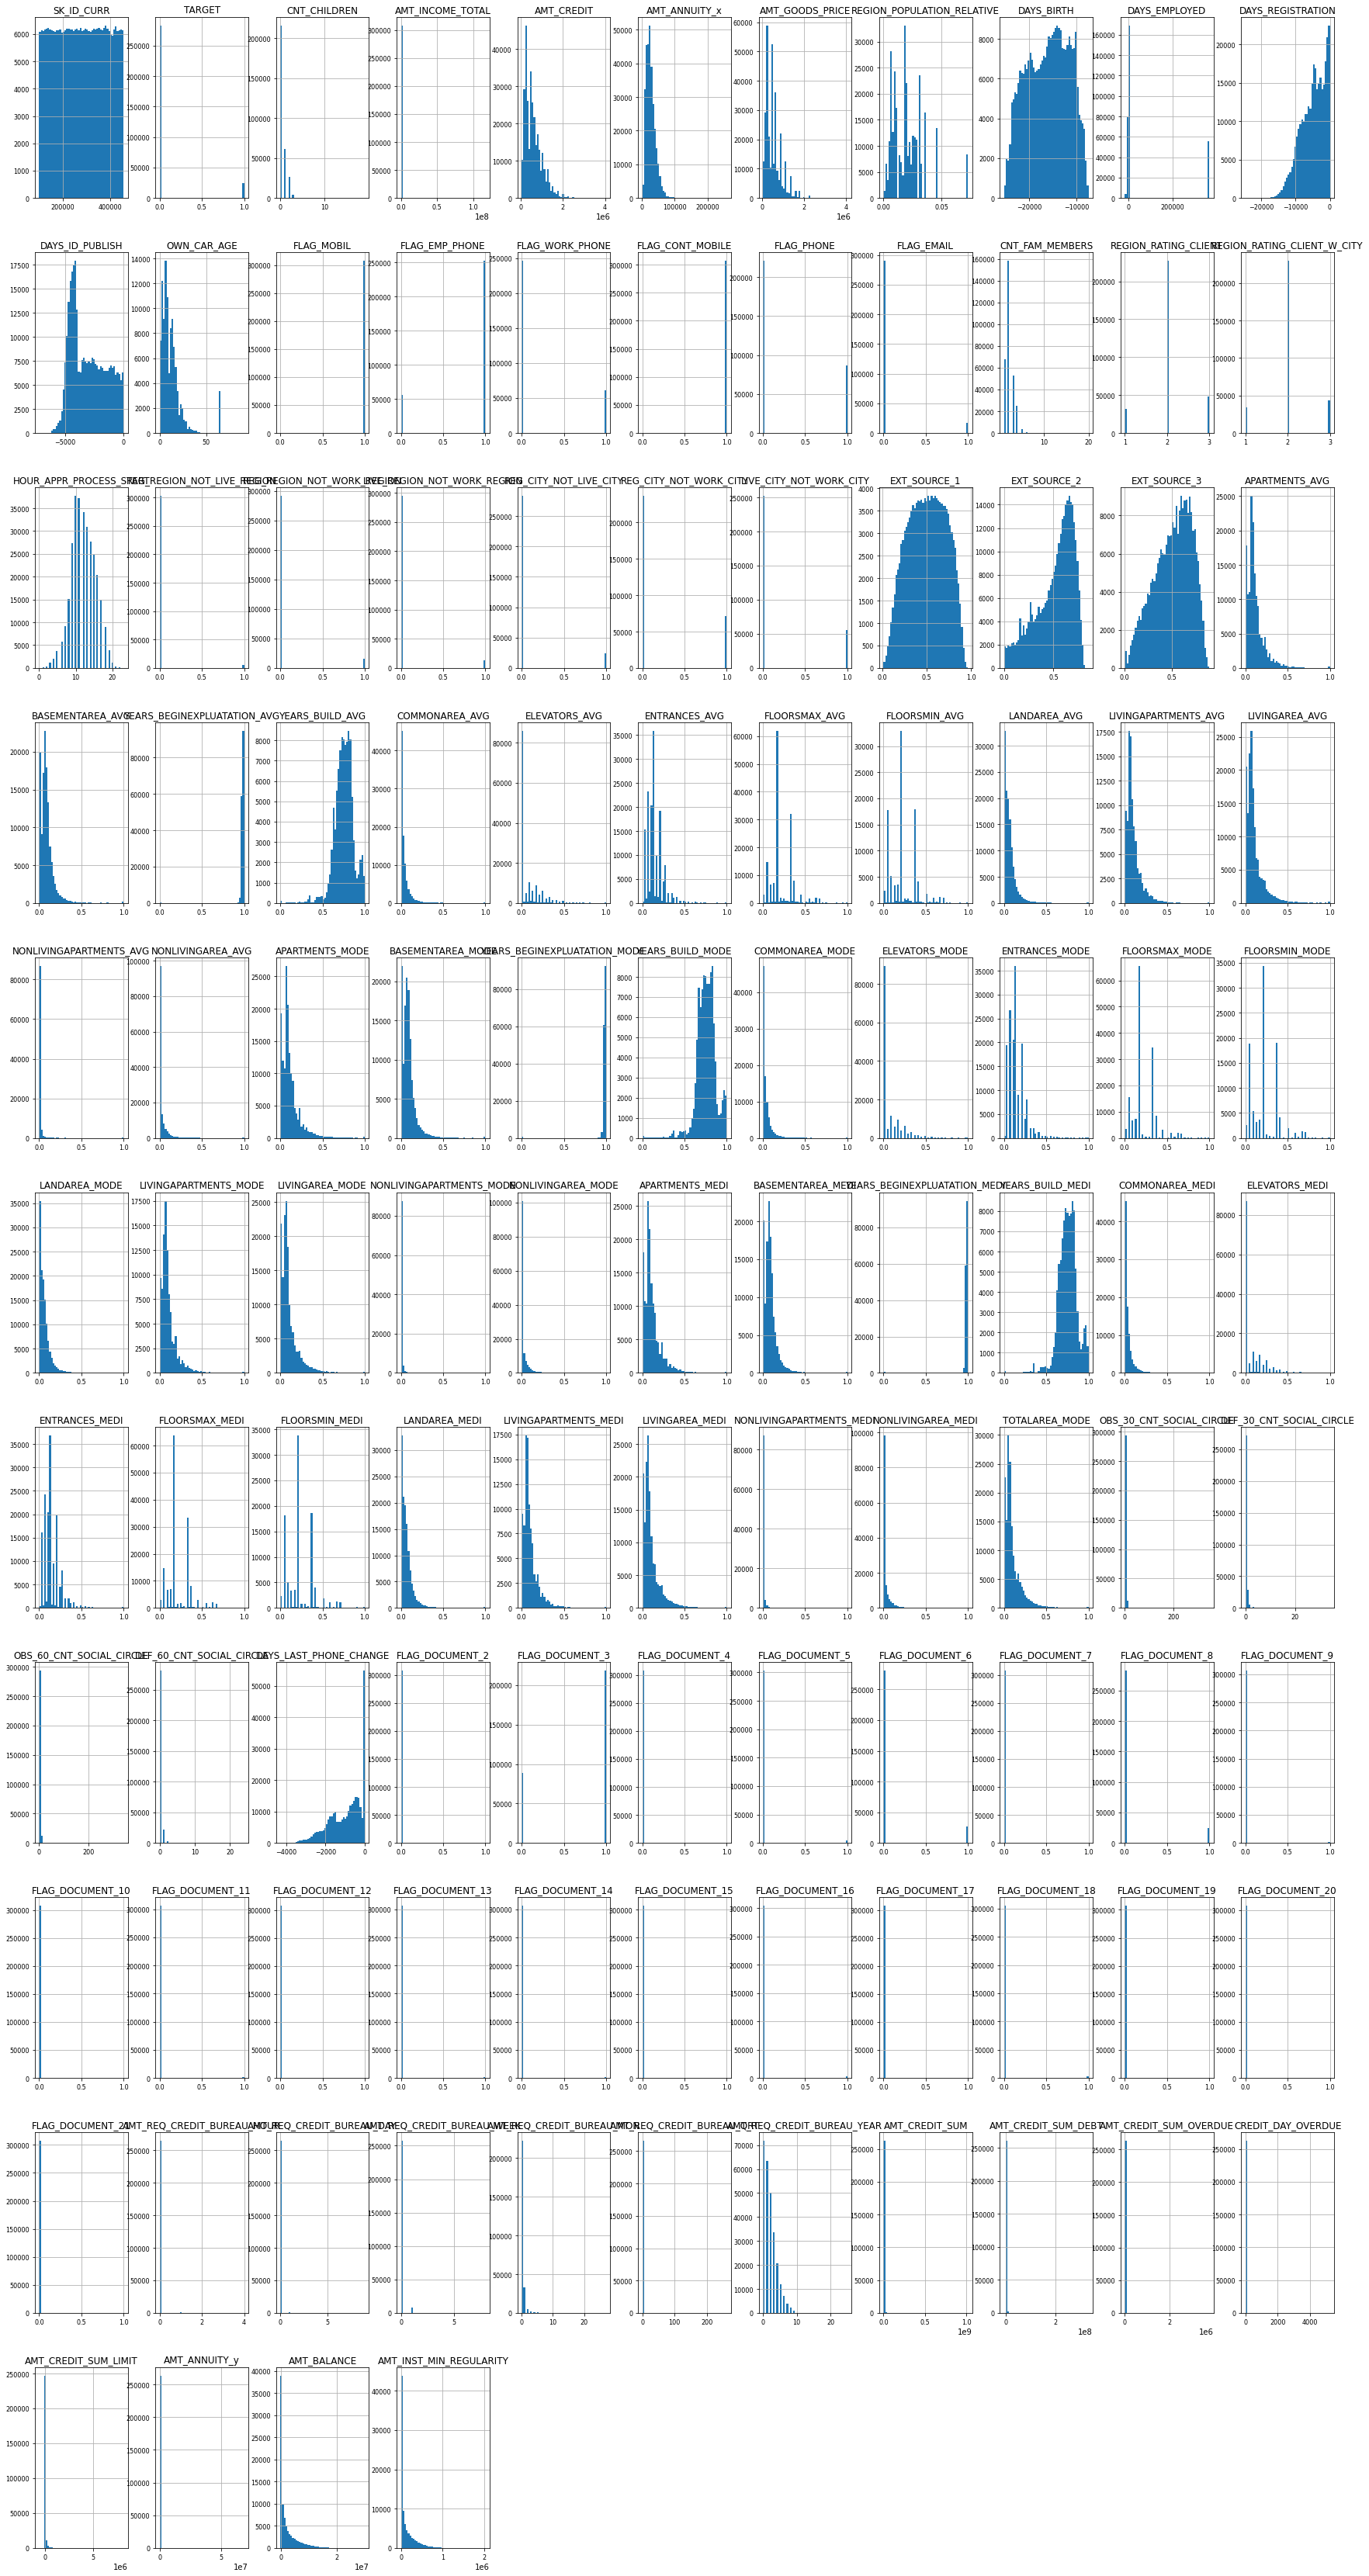

In [192]:
df_num.hist(figsize=(30, 60), bins=50, xlabelsize=8, ylabelsize=8)

###### Summary of Data insights from Visual plots
###### Amount Credit is in range of 0-2M where > 70% lies within 1M
###### Annual Annuity value is in range of 0-100K
###### Amount Good Price is in range of 0-2M with >70% value lies within 1M
###### Days birth is in range of 0 to -30K Days
###### Days ID publish has mojority of values falls in range of 0 to -5000 days
###### Days Registration is in range of 0 to -15K Days
###### EXT_SOURCE 1, EXT_SOURCE 2, EXT_SOURCE 3 has values spread between 0 to 1
###### Days last phone changed has majority of value lies between 0 to -2000 Days

In [193]:
app_bureau_credit_data.to_csv('C:/Users/khann/Desktop/Python Assignments/Final/AppBureauCredit.csv', header=None,index=False)

## Correlation

###### Now we'll try to find which features are strongly correlated with Target. We'll store them in a var called golden_features_list. We'll reuse our df_num dataset to do so.

In [194]:
df_num_corr = app_bureau_credit_data.corr()['TARGET'][:-1] # -1 because the latest row is Target
golden_features_list = df_num_corr[abs(df_num_corr) > 0.005].sort_values(ascending=False)

In [195]:
print(golden_features_list.head(50))

TARGET                          1.000000
DAYS_BIRTH                      0.078239
REGION_RATING_CLIENT_W_CITY     0.060893
REGION_RATING_CLIENT            0.058899
DAYS_LAST_PHONE_CHANGE          0.055218
DAYS_ID_PUBLISH                 0.051457
REG_CITY_NOT_WORK_CITY          0.050994
FLAG_EMP_PHONE                  0.045982
REG_CITY_NOT_LIVE_CITY          0.044395
FLAG_DOCUMENT_3                 0.044346
DAYS_REGISTRATION               0.041975
OWN_CAR_AGE                     0.037612
LIVE_CITY_NOT_WORK_CITY         0.032518
DEF_30_CNT_SOCIAL_CIRCLE        0.032248
DEF_60_CNT_SOCIAL_CIRCLE        0.031276
FLAG_WORK_PHONE                 0.028524
AMT_REQ_CREDIT_BUREAU_YEAR      0.019930
CNT_CHILDREN                    0.019187
AMT_BALANCE                     0.018663
AMT_CREDIT_SUM_OVERDUE          0.013335
CNT_FAM_MEMBERS                 0.009308
OBS_30_CNT_SOCIAL_CIRCLE        0.009131
OBS_60_CNT_SOCIAL_CIRCLE        0.009022
AMT_CREDIT_SUM_DEBT             0.007144
REG_REGION_NOT_W

In [196]:
print('Top 10 Features with Poitive corelation with Target\n')
print(app_bureau_credit_data.corr()['TARGET'].sort_values().tail(10))

Top 10 Features with Poitive corelation with Target

FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64


In [197]:
print('Top 10 Features with Negetive corelation with Target\n')
print(app_bureau_credit_data.corr()['TARGET'].sort_values().head(10))

Top 10 Features with Negetive corelation with Target

EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


In [198]:
app_bureau_credit_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,...,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_OVERDUE,CREDIT_DAY_OVERDUE,AMT_CREDIT_SUM_LIMIT,AMT_ANNUITY_y,AMT_BALANCE,AMT_INST_MIN_REGULARITY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,1.0,865055.565,245781.0,0.0,0.0,31988.565,0.0,NaN,NaN
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,1017400.500,0.0,0.0,0.0,810000.000,0.0,NaN,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,189037.800,0.0,0.0,0.0,0.000,0.0,NaN,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,146250.000,0.0,0.0,0.0,0.000,0.0,NaN,NaN


Generate heatmap of top 5 positive correlation features


Text(0.5, 1.0, 'Correlation Heatmap')

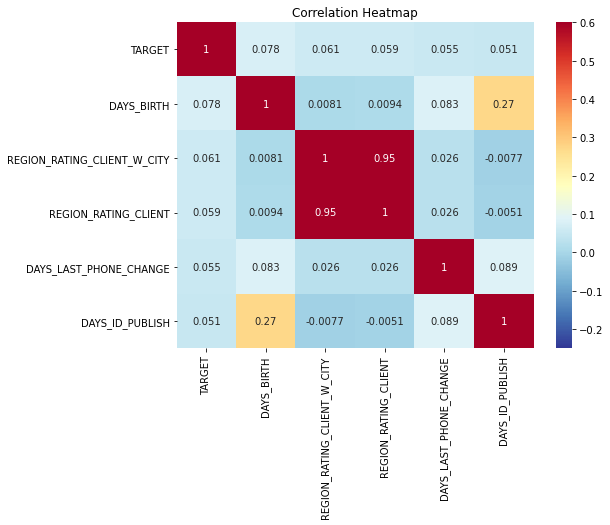

In [199]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, QuantileTransformer
from sklearn.feature_selection import SelectKBest, f_classif
import seaborn as sns

print('Generate heatmap of top 5 positive correlation features')
PosTarget=app_bureau_credit_data[['TARGET','DAYS_BIRTH','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT','DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH']]
PosTarget_cor=PosTarget.corr()
plt.figure(figsize=(8,6))
sns.heatmap(PosTarget_cor,cmap=plt.cm.RdYlBu_r, vmin=-.25, annot=True, vmax=0.6 )
plt.title('Correlation Heatmap')

Generate heatmap of top 5 negetive correlation features


Text(0.5, 1.0, 'Correlation Heatmap')

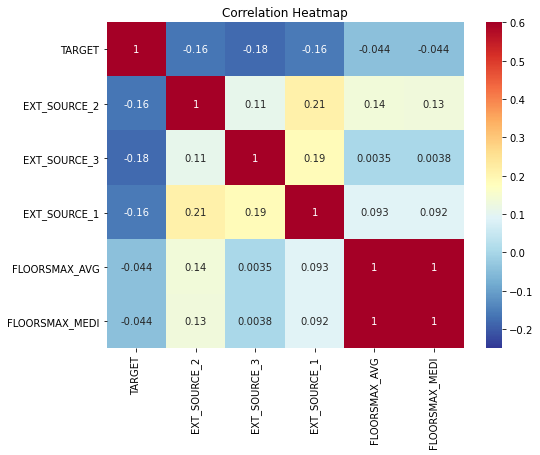

In [200]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, QuantileTransformer
from sklearn.feature_selection import SelectKBest, f_classif
import seaborn as sns

print('Generate heatmap of top 5 negetive correlation features')
PosTarget=app_bureau_credit_data[['TARGET','EXT_SOURCE_2','EXT_SOURCE_3','EXT_SOURCE_1','FLOORSMAX_AVG','FLOORSMAX_MEDI']]
PosTarget_cor=PosTarget.corr()
plt.figure(figsize=(8,6))
sns.heatmap(PosTarget_cor,cmap=plt.cm.RdYlBu_r, vmin=-.25, annot=True, vmax=0.6 )
plt.title('Correlation Heatmap')

### Plotting Features with Target

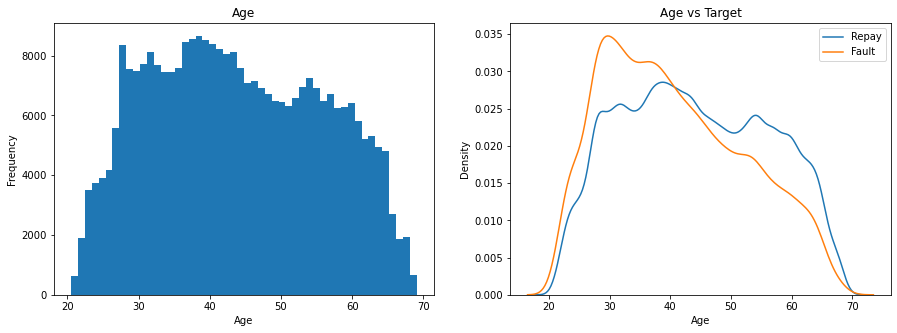

In [201]:
import warnings

warnings.filterwarnings('ignore')
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
(app_bureau_credit_data['DAYS_BIRTH']/-365.25).plot(kind='hist', bins=50, title='Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plot_daysofbirth = app_bureau_credit_data[['DAYS_BIRTH', 'TARGET']]
plot_daysofbirth['DAYS_BIRTH'] = plot_daysofbirth['DAYS_BIRTH']/-365.25
sns.distplot(plot_daysofbirth[plot_daysofbirth['TARGET']==0]['DAYS_BIRTH'], hist=False, label='Repay')
sns.distplot(plot_daysofbirth[plot_daysofbirth['TARGET']==1]['DAYS_BIRTH'], hist=False, label='Fault')
plt.title('Age vs Target')
plt.xlabel('Age')
plt.legend()
plt.show()

###### Diagram above shows that ~Age < 40 have more changes of Faulting on loan, chances are getting lower for Age > 40

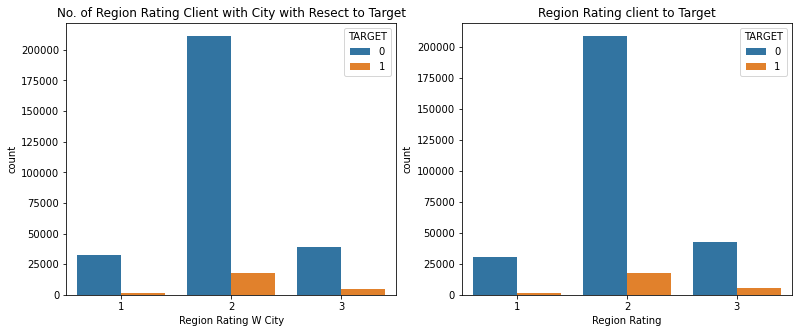

In [202]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(13,5))
plt.subplot(1, 2, 1)
sns.countplot(data=app_bureau_credit_data, x='REGION_RATING_CLIENT_W_CITY', hue='TARGET')
plt.title('No. of Region Rating Client with City with Resect to Target')
plt.xlabel('Region Rating W City')
plt.subplot(1, 2, 2)
sns.countplot(data=app_bureau_credit_data, x='REGION_RATING_CLIENT', hue='TARGET')
plt.title('Region Rating client to Target')
plt.xlabel('Region Rating')
plt.show()

###### Region Rating W City and Region Rating shows that in all the Ratings 1, 2, 3 Fault exist, however there is no clear trend

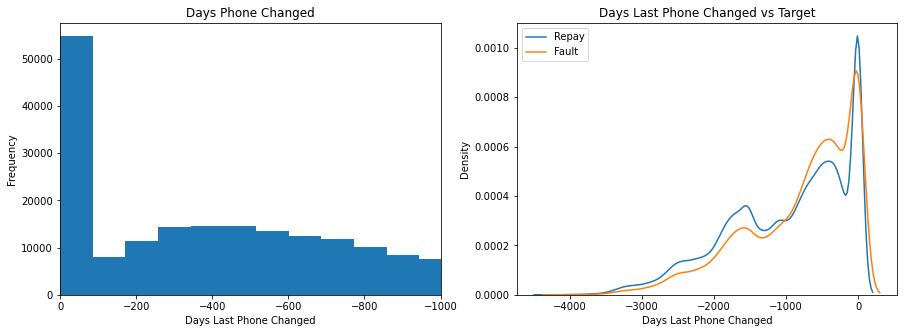

In [203]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
(app_bureau_credit_data['DAYS_LAST_PHONE_CHANGE']).plot(kind='hist', bins=50, title='Days Phone Changed')
plt.xlabel('Days Last Phone Changed')
plt.ylabel('Frequency')
plt.xlim(0,-1000);
plt.subplot(1, 2, 2)
plot_daysofbirth = app_bureau_credit_data[['DAYS_LAST_PHONE_CHANGE', 'TARGET']]
plot_daysofbirth['DAYS_LAST_PHONE_CHANGE'] = plot_daysofbirth['DAYS_LAST_PHONE_CHANGE']
sns.distplot(plot_daysofbirth[plot_daysofbirth['TARGET']==0]['DAYS_LAST_PHONE_CHANGE'], hist=False, label='Repay')
sns.distplot(plot_daysofbirth[plot_daysofbirth['TARGET']==1]['DAYS_LAST_PHONE_CHANGE'], hist=False, label='Fault')
plt.title('Days Last Phone Changed vs Target')
plt.xlabel('Days Last Phone Changed')
plt.legend()
plt.show()

###### Diagram above shows that the Train data has > 150000 record where Phone number is changed between 0-1000 Days. Those who have changed phone numbers within 500 days are more likely to faulter on loan

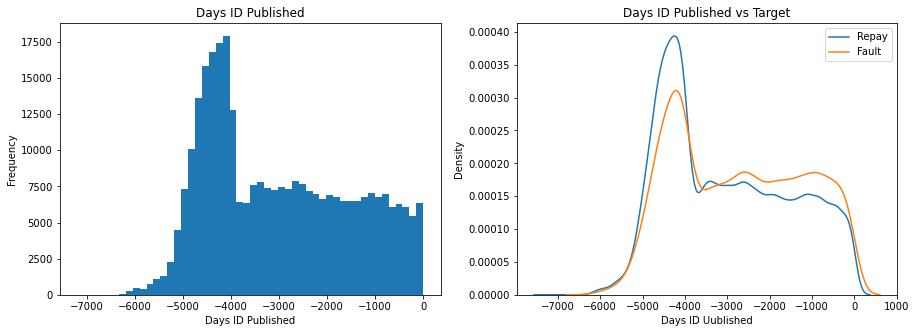

In [87]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
(app_bureau_credit_data['DAYS_ID_PUBLISH']).plot(kind='hist', bins=50, title='Days ID Published')
plt.xlabel('Days ID Published')
plt.ylabel('Frequency')
#plt.xlim(0,-1000);
plt.subplot(1, 2, 2)
plot_daysidpublished = app_bureau_credit_data[['DAYS_ID_PUBLISH', 'TARGET']]
plot_daysidpublished['DAYS_ID_PUBLISH'] = plot_daysidpublished['DAYS_ID_PUBLISH']
sns.distplot(plot_daysidpublished[plot_daysidpublished['TARGET']==0]['DAYS_ID_PUBLISH'], hist=False, label='Repay')
sns.distplot(plot_daysidpublished[plot_daysidpublished['TARGET']==1]['DAYS_ID_PUBLISH'], hist=False, label='Fault')
plt.title('Days ID Published vs Target')
plt.xlabel('Days ID Uublished')
plt.legend()
plt.show()

###### From the Diagram people having ID Published from 0 to 3000 Days have more occurances of defaulting on loans

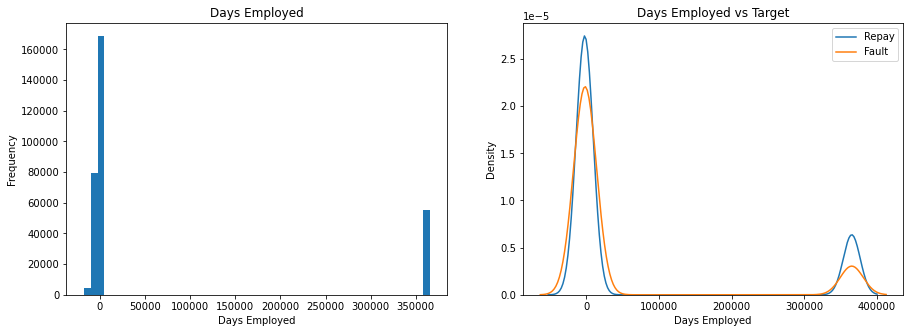

In [204]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
(app_bureau_credit_data['DAYS_EMPLOYED']).plot(kind='hist', bins=50, title='Days Employed')
plt.xlabel('Days Employed')
plt.ylabel('Frequency')
#plt.xlim(0,-1000);
plt.subplot(1, 2, 2)
plot_daysidpublished = app_bureau_credit_data[['DAYS_EMPLOYED', 'TARGET']]
plot_daysidpublished['DAYS_EMPLOYED'] = plot_daysidpublished['DAYS_EMPLOYED']
sns.distplot(plot_daysidpublished[plot_daysidpublished['TARGET']==0]['DAYS_EMPLOYED'], hist=False, label='Repay')
sns.distplot(plot_daysidpublished[plot_daysidpublished['TARGET']==1]['DAYS_EMPLOYED'], hist=False, label='Fault')
plt.title('Days Employed vs Target')
plt.xlabel('Days Employed')
plt.legend()
plt.show()

###### From the graph above it appears that the Days Empolyed field has outliers and there is no pattern that can be visually obeserved

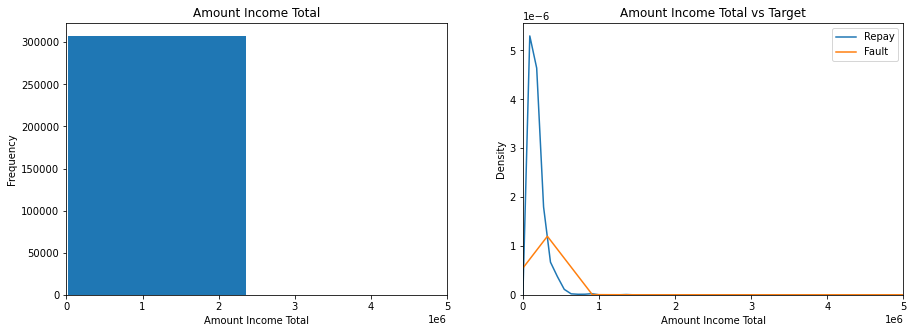

In [205]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
(app_bureau_credit_data['AMT_INCOME_TOTAL']).plot(kind='hist', bins=50, title='Amount Income Total')
plt.xlabel('Amount Income Total')
plt.ylabel('Frequency')
plt.xlim(0,5e6);
plt.subplot(1, 2, 2)
plot_daysidpublished = app_bureau_credit_data[['AMT_INCOME_TOTAL', 'TARGET']]
plot_daysidpublished['AMT_INCOME_TOTAL'] = plot_daysidpublished['AMT_INCOME_TOTAL']
sns.distplot(plot_daysidpublished[plot_daysidpublished['TARGET']==0]['AMT_INCOME_TOTAL'], hist=False, label='Repay')
sns.distplot(plot_daysidpublished[plot_daysidpublished['TARGET']==1]['AMT_INCOME_TOTAL'], hist=False, label='Fault')
plt.title('Amount Income Total vs Target')
plt.xlabel('Amount Income Total')
plt.xlim(0,5e6);
plt.legend()
plt.show()

###### Amount Total Income graph shows more chances of defaults when income is in between 500K-1M

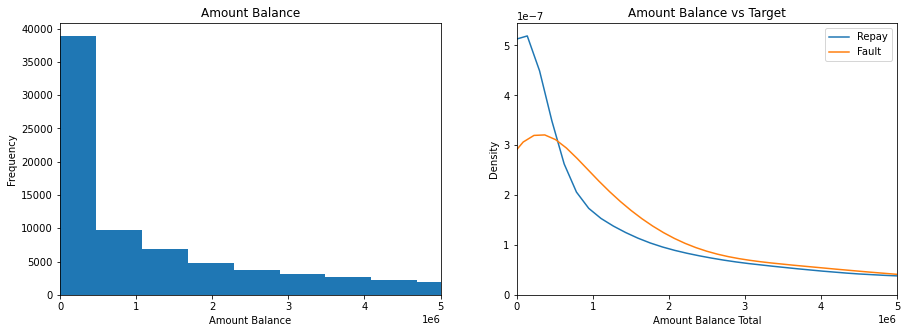

In [206]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
(app_bureau_credit_data['AMT_BALANCE']).plot(kind='hist', bins=50, title='Amount Balance')
plt.xlabel('Amount Balance')
plt.ylabel('Frequency')
plt.xlim(0,5e6);
plt.subplot(1, 2, 2)
plot_daysidpublished = app_bureau_credit_data[['AMT_BALANCE', 'TARGET']]
plot_daysidpublished['AMT_BALANCE'] = plot_daysidpublished['AMT_BALANCE']
sns.distplot(plot_daysidpublished[plot_daysidpublished['TARGET']==0]['AMT_BALANCE'], hist=False, label='Repay')
sns.distplot(plot_daysidpublished[plot_daysidpublished['TARGET']==1]['AMT_BALANCE'], hist=False, label='Fault')
plt.title('Amount Balance vs Target')
plt.xlabel('Amount Balance Total')
plt.xlim(0,5e6);
plt.legend()
plt.show()

###### Chances are defaulting on loan increases when account balance is more than 500K

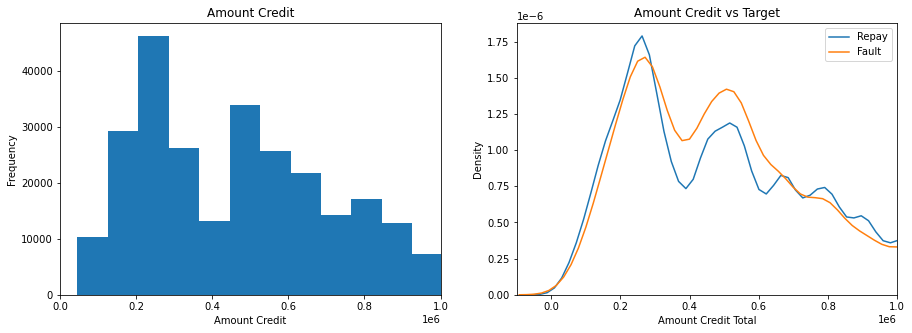

In [207]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
(app_bureau_credit_data['AMT_CREDIT']).plot(kind='hist', bins=50, title='Amount Credit')
plt.xlabel('Amount Credit')
plt.ylabel('Frequency')
plt.xlim(0,1e6);
plt.subplot(1, 2, 2)
plot_daysidpublished = app_bureau_credit_data[['AMT_CREDIT', 'TARGET']]
plot_daysidpublished['AMT_CREDIT'] = plot_daysidpublished['AMT_CREDIT']
sns.distplot(plot_daysidpublished[plot_daysidpublished['TARGET']==0]['AMT_CREDIT'], hist=False, label='Repay')
sns.distplot(plot_daysidpublished[plot_daysidpublished['TARGET']==1]['AMT_CREDIT'], hist=False, label='Fault')
plt.title('Amount Credit vs Target')
plt.xlabel('Amount Credit Total')
plt.xlim(-100000,1e6);
plt.legend()
plt.show()

##### More defaults are observed when Amount Credit falls in range of 300K-700K

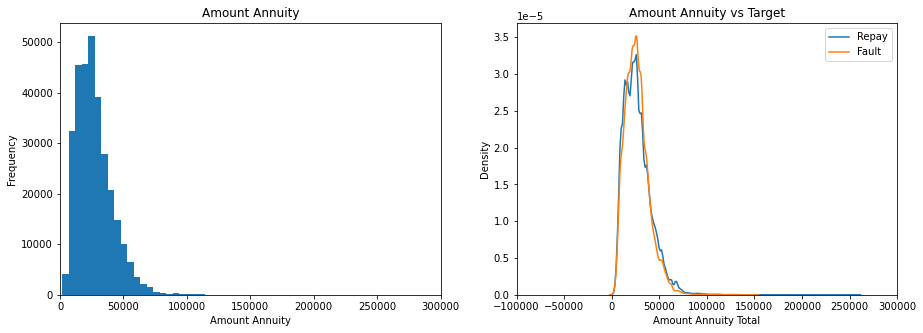

In [208]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
(app_bureau_credit_data['AMT_ANNUITY_x']).plot(kind='hist', bins=50, title='Amount Annuity')
plt.xlabel('Amount Annuity')
plt.ylabel('Frequency')
plt.xlim(0,300000);
plt.subplot(1, 2, 2)
plot_daysidpublished = app_bureau_credit_data[['AMT_ANNUITY_x', 'TARGET']]
plot_daysidpublished['AMT_ANNUITY_x'] = plot_daysidpublished['AMT_ANNUITY_x']
sns.distplot(plot_daysidpublished[plot_daysidpublished['TARGET']==0]['AMT_ANNUITY_x'], hist=False, label='Repay')
sns.distplot(plot_daysidpublished[plot_daysidpublished['TARGET']==1]['AMT_ANNUITY_x'], hist=False, label='Fault')
plt.title('Amount Annuity vs Target')
plt.xlabel('Amount Annuity Total')
plt.xlim(-100000,300000);
plt.legend()
plt.show()

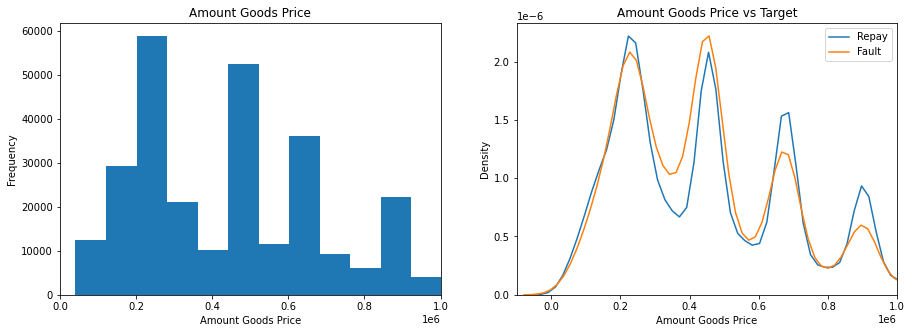

In [209]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
(app_bureau_credit_data['AMT_GOODS_PRICE']).plot(kind='hist', bins=50, title='Amount Goods Price')
plt.xlabel('Amount Goods Price')
plt.ylabel('Frequency')
plt.xlim(0,1e6);
plt.subplot(1, 2, 2)
plot_daysidpublished = app_bureau_credit_data[['AMT_GOODS_PRICE', 'TARGET']]
plot_daysidpublished['AMT_GOODS_PRICE'] = plot_daysidpublished['AMT_GOODS_PRICE']
sns.distplot(plot_daysidpublished[plot_daysidpublished['TARGET']==0]['AMT_GOODS_PRICE'], hist=False, label='Repay')
sns.distplot(plot_daysidpublished[plot_daysidpublished['TARGET']==1]['AMT_GOODS_PRICE'], hist=False, label='Fault')
plt.title('Amount Goods Price vs Target')
plt.xlabel('Amount Goods Price')
plt.xlim(-100000,1e6);
plt.legend()
plt.show()

###### Graph above as Amount Goods Price goes beyond 300K up until 700k there is higher probability of person defaulting on loan

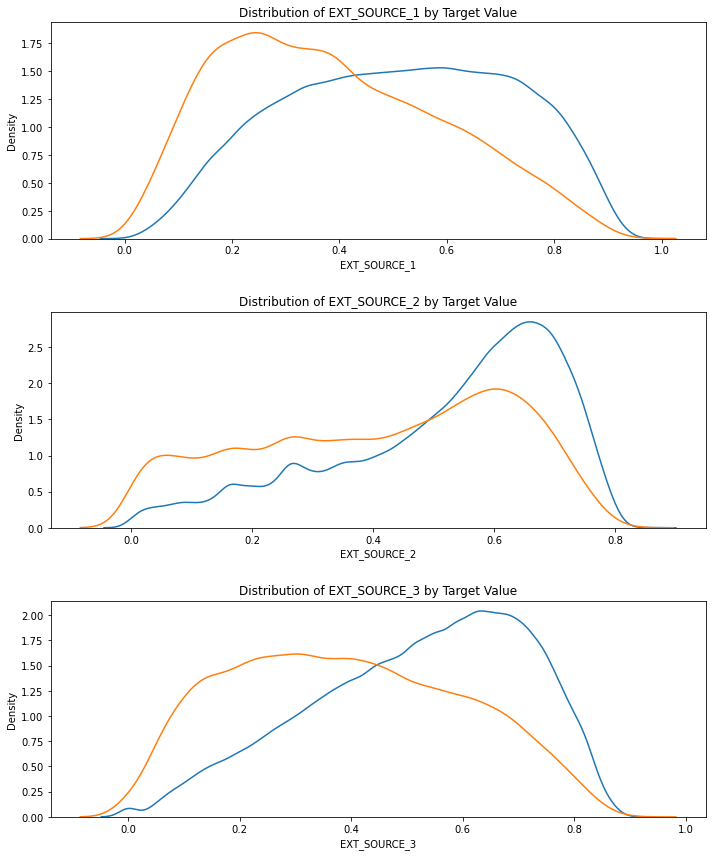

In [210]:
plt.figure(figsize = (10, 12))
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    plt.subplot(3, 1, i + 1)
    sns.kdeplot(app_bureau_credit_data.loc[app_bureau_credit_data['TARGET'] == 0, source], label = 'target == 0')
    sns.kdeplot(app_bureau_credit_data.loc[app_bureau_credit_data['TARGET'] == 1, source], label = 'target == 1')
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    plt.tight_layout(h_pad = 2.5)

###### EXT_SOURCE 1 shows that chances of loan defaluts are more when value is in between 0.0 to 0.4
###### EXT_SOURCE 2 shows that chances of loan defaluts are more when value is in between 0.0 to 0.5
###### EXT_SOURCE 3 shows that chances of loan defaluts are more when value is in between 0.0 to 0.4

## -----------------------------------------------------------------------------------------------------------------------
## Data Analysis Conclusion - 

#### From the Data Analysis perfomed on Application Train, Bureau, Credit data following features are Correlated with Target with higher variance value

###### DAYS_BIRTH
###### DAYS_LAST_PHONE_CHANGE
###### DAYS_ID_PUBLISH
###### AMT_BALANCE
###### AMT_GOODS_PRICE
###### AMT_CREDIT
###### AMT_INCOME_TOTAL
###### AMT_ANNUITY
###### EXT_SOURCE_1
###### EXT_SOURCE_2
###### EXT_SOURCE_3


# 2. Feature Selection

###### Feature selection is the process of reducing the number of input variables. It is important to build model which is less computationaly expensive and provide high performance. We will use statistical method for evaluating the relationship between input variables and the target variable and selecting variables with higher variance or stronger relationship with Target

### Here we will explore both Supervised and Unsupervised Feature Selection techniques

In [3]:
# Generate dataframe for Feature Selection. Select Target as Y and Rest of the columns except SKU_ID_CURR as X
app_bureau_credit_data=app_bureau_credit_data.fillna(0)
getappfile=pd.get_dummies(app_bureau_credit_data)
print(getappfile.head(2))
X_dummies=getappfile.iloc[:,2:]
X = getappfile.iloc[:,2:].values.astype(float)
Y = getappfile.iloc[:,1].values.astype(int)

   SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0          202500.0    406597.5   
1      100003       0             0          270000.0   1293502.5   

   AMT_ANNUITY_x  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0        24700.5         351000.0                    0.018801       -9461   
1        35698.5        1129500.0                    0.003541      -16765   

   DAYS_EMPLOYED  ...  WALLSMATERIAL_MODE_Block  WALLSMATERIAL_MODE_Mixed  \
0           -637  ...                         0                         0   
1          -1188  ...                         1                         0   

   WALLSMATERIAL_MODE_Monolithic  WALLSMATERIAL_MODE_Others  \
0                              0                          0   
1                              0                          0   

   WALLSMATERIAL_MODE_Panel  WALLSMATERIAL_MODE_Stone, brick  \
0                         0                                1   
1         

## Feature Selection through Supervised Learning - Tree ( Random Forest)

In [4]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, QuantileTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=30000, train_size=100000, random_state=0, shuffle=True, stratify=None)
clr=RandomForestClassifier(n_estimators=100)
#y_train=y_train.reshape(-1,1)
print(y_train)
clr.fit(X_train,y_train)
from sklearn import metrics
y_pred=clr.predict(X_test)
print("Accuracy of random forest tree:",metrics.accuracy_score(y_test, y_pred))

[0 0 0 ... 0 0 0]
Accuracy of random forest tree: 0.9205333333333333


###### Generate  Feature importance list in descending order

In [186]:
y_pred=clr.predict(X_test)
feature_names = X_dummies.columns
feature_imp = pd.Series(clr.feature_importances_,index=feature_names).sort_values(ascending=False)
print(feature_imp[:25])

EXT_SOURCE_2                  0.047732
EXT_SOURCE_3                  0.034892
DAYS_ID_PUBLISH               0.030951
DAYS_BIRTH                    0.030247
DAYS_REGISTRATION             0.029142
AMT_ANNUITY_x                 0.026841
DAYS_LAST_PHONE_CHANGE        0.026441
AMT_CREDIT                    0.025288
DAYS_EMPLOYED                 0.025268
AMT_CREDIT_SUM                0.024628
AMT_INCOME_TOTAL              0.022628
REGION_POPULATION_RELATIVE    0.022454
AMT_GOODS_PRICE               0.022358
AMT_CREDIT_SUM_DEBT           0.021535
HOUR_APPR_PROCESS_START       0.020179
EXT_SOURCE_1                  0.017473
AMT_REQ_CREDIT_BUREAU_YEAR    0.013843
OBS_30_CNT_SOCIAL_CIRCLE      0.012157
OBS_60_CNT_SOCIAL_CIRCLE      0.011732
AMT_BALANCE                   0.010845
OWN_CAR_AGE                   0.010713
AMT_INST_MIN_REGULARITY       0.010415
AMT_ANNUITY_y                 0.009896
CNT_FAM_MEMBERS               0.009522
AMT_CREDIT_SUM_LIMIT          0.008904
dtype: float64


###### Visualize top 10 Features

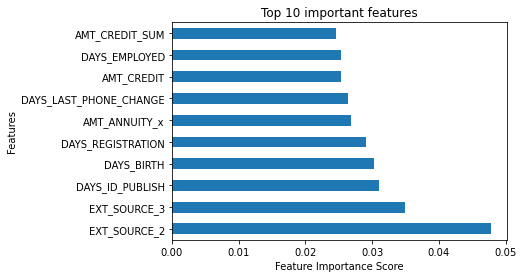

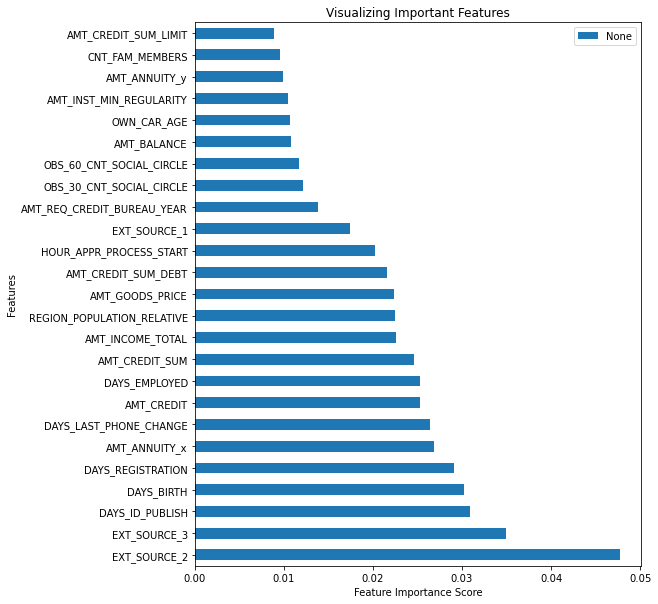

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot

feature_imp.nlargest(10).plot(kind='barh')
plt.title("Top 10 important features")
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()


#sns.barplot(x=feature_imp.nlargest(50), y=feature_imp.index(50))
# Add labels to your graph
feature_imp.nlargest(25).plot(kind='barh',figsize=(8,10))
plt.title("Top 25 important features")
#plt.figure(figsize=(15,15))
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

## List of Top Features from Tree analysis
###### EXT_SOURCE_2                    0.047732
###### EXT_SOURCE_3                    0.034892
###### DAYS_ID_PUBLISH                 0.030951
###### DAYS_BIRTH                      0.030247
###### DAYS_REGISTRATION               0.029142
###### AMT_ANNUITY_x                   0.026841
###### DAYS_LAST_PHONE_CHANGE          0.026441
###### AMT_CREDIT                      0.025288
###### DAYS_EMPLOYED                   0.025268
###### AMT_CREDIT_SUM                  0.024628
###### AMT_INCOME_TOTAL                0.022628
###### REGION_POPULATION_RELATIVE      0.022454
###### AMT_GOODS_PRICE                 0.022358
###### AMT_CREDIT_SUM_DEBT             0.021535

## Feature Selection Through Unsupervised Learning - PCA 

In [182]:
# Selecting numeric columns for analysis. Standardizing and Normalizing for PCA analysis
df = app_bureau_credit_data.iloc[:, 1:]
#df = getappfile.iloc[:, 1:]
df_noobj=df.select_dtypes(exclude=["object"])
#print(df.head(2))
df_st =  StandardScaler().fit_transform(df_noobj) 
df_st = normalize(df_st)
df_new=pd.DataFrame(df_st, columns=df_noobj.columns)
print(df_new.head(2))

     TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY_x  \
0  0.380396     -0.065104          0.016022   -0.053894      -0.018720   
1 -0.025772     -0.050227          0.037117    0.150057       0.051546   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        -0.057002                   -0.016847    0.169866      -0.051428   
1         0.139189                   -0.108948   -0.014508      -0.040015   

   DAYS_REGISTRATION  ...  AMT_REQ_CREDIT_BUREAU_QRT  \
0           0.042818  ...                   -0.03479   
1           0.093811  ...                   -0.02684   

   AMT_REQ_CREDIT_BUREAU_YEAR  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  \
0                   -0.039085       -0.023690            -0.022350   
1                   -0.077015       -0.014842            -0.031222   

   AMT_CREDIT_SUM_OVERDUE  CREDIT_DAY_OVERDUE  AMT_CREDIT_SUM_LIMIT  \
0               -0.001411           -0.005574              0.014292   
1               -0.0010

###### Run PCA analysis

In [183]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca_out = pca.fit(df_st)
principalComponents = pca.fit_transform(df_st)
principalDf = pd.DataFrame(data = principalComponents)
            # , columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
principalDf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.186624,-0.065046,-0.221620,0.068713,-0.126037,0.089086,0.284130,-0.422726,-0.210750,-0.118913,0.113106,0.053925,0.229074,-0.106551,0.528305,0.245442,-0.049904,0.115450,-0.009526,0.199605
1,0.459244,-0.115102,0.199920,0.001573,-0.021808,-0.237139,0.103544,-0.020363,-0.125297,-0.197632,0.031717,-0.010380,0.050838,0.051508,-0.015845,-0.067397,-0.008921,0.132508,0.071276,-0.079038
2,-0.475513,0.129695,-0.220127,-0.155220,0.171814,-0.096270,-0.019296,0.076705,0.123342,-0.186905,0.322582,0.219342,-0.123103,-0.217802,-0.063117,0.128860,0.089956,-0.002753,-0.030002,-0.043463
3,-0.584065,0.084158,-0.048724,-0.075228,0.192923,-0.052278,0.052180,-0.149336,-0.159592,-0.260138,-0.055857,-0.180346,-0.017367,0.123305,-0.216874,0.182510,-0.033131,-0.164863,0.146794,-0.063625
4,-0.476126,-0.029696,-0.023480,-0.328611,-0.174450,-0.211521,-0.214482,-0.028329,-0.164829,0.094996,-0.018279,0.222088,-0.060358,-0.081853,-0.177609,0.244939,0.005014,0.154387,-0.040281,0.121516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.710085,-0.062109,0.027296,-0.369496,0.061993,-0.039472,-0.028848,0.085908,-0.187026,-0.220146,-0.101647,0.127026,-0.066572,-0.066040,-0.072697,0.069539,-0.000656,0.157021,0.144189,-0.007171
307507,0.263161,0.510891,-0.354563,0.042523,0.052980,-0.290108,-0.015294,-0.090239,-0.196000,0.027590,0.171143,-0.172031,0.306733,-0.003001,0.007563,-0.098950,0.064912,0.047782,-0.122177,0.028775
307508,0.455121,-0.067739,-0.007165,-0.034511,-0.154665,0.157114,-0.156118,-0.058296,0.120624,-0.008710,0.005599,-0.012917,-0.088028,0.120735,-0.058678,-0.018346,0.020001,0.069090,-0.030907,0.075643
307509,-0.194860,-0.187818,-0.272880,-0.035676,0.118189,-0.098817,-0.226876,-0.214980,-0.188947,0.185753,-0.149529,-0.010400,0.073439,-0.036532,0.173276,-0.126650,-0.257896,-0.067809,0.186370,0.184442


In [184]:
# Create list of important features
def create_importance_dataframe(pca, applicationdata):
    importance_df  = pd.DataFrame(pca.components_)
    importance_df.columns  = applicationdata.columns
    importance_df =importance_df.apply(np.abs)
    importance_df=importance_df.transpose()
    num_pcs = importance_df.shape[1]
    new_columns = [f'PC{i}' for i in range(1, num_pcs + 1)]
    importance_df.columns  =new_columns
    return importance_df

# Call function to create importance df
importance_df  =create_importance_dataframe(pca_out, df_new)
# Show first few rows
display(importance_df)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
TARGET,0.005691,0.039309,0.065942,0.000085,0.084351,0.015424,0.058815,0.054644,0.076836,0.057940,0.043190,0.009808,0.301202,0.163820,0.101995,0.095085,0.122854,0.035366,0.026869,0.601671
CNT_CHILDREN,0.007965,0.225707,0.051755,0.112390,0.043528,0.200565,0.172477,0.467991,0.082097,0.194770,0.017543,0.177993,0.139893,0.026310,0.005789,0.037704,0.022190,0.044045,0.003524,0.071931
AMT_INCOME_TOTAL,0.015235,0.036514,0.092995,0.012941,0.015987,0.009510,0.011216,0.001244,0.016012,0.010411,0.032586,0.048113,0.005621,0.017039,0.013002,0.011426,0.017976,0.006166,0.004621,0.018172
AMT_CREDIT,0.021584,0.076809,0.456402,0.261936,0.130196,0.061321,0.130261,0.052486,0.120946,0.002895,0.038742,0.012397,0.044304,0.028821,0.006107,0.005556,0.050062,0.010504,0.009434,0.037306
AMT_ANNUITY_x,0.024137,0.101810,0.411505,0.221193,0.113287,0.056909,0.118678,0.041708,0.133237,0.005574,0.003271,0.001557,0.037509,0.028990,0.016089,0.012977,0.026611,0.000171,0.008553,0.026530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CREDIT_DAY_OVERDUE,0.002232,0.000214,0.001433,0.003335,0.005961,0.003625,0.001825,0.001321,0.001585,0.001485,0.001769,0.002198,0.004572,0.001129,0.001914,0.000703,0.002095,0.001684,0.000395,0.002819
AMT_CREDIT_SUM_LIMIT,0.012095,0.009360,0.034874,0.000952,0.007385,0.009100,0.003740,0.008163,0.039317,0.005157,0.009653,0.037739,0.005817,0.003185,0.009376,0.026711,0.004556,0.011520,0.025619,0.004789
AMT_ANNUITY_y,0.002317,0.003333,0.007401,0.004589,0.004298,0.002733,0.000377,0.000998,0.009019,0.001976,0.003719,0.009889,0.000628,0.001768,0.006170,0.007886,0.002180,0.003463,0.003963,0.006147
AMT_BALANCE,0.010675,0.014132,0.063289,0.004348,0.029748,0.043641,0.068167,0.047877,0.281095,0.020420,0.238054,0.203868,0.440986,0.056103,0.109542,0.053287,0.005559,0.000882,0.004598,0.220276


### List of Top Features from PCA analysis below

###### AMT_GOODS_PRICE            0.456911
###### AMT_CREDIT                 0.456402
###### AMT_ANNUITY_x              0.411505   
###### FLAG_EMP_PHONE             0.446070
###### DAYS_EMPLOYED              0.445264
###### DAYS_BIRTH                 0.380783
###### CNT_FAM_MEMBERS            0.468723
###### CNT_CHILDREN               0.467991
###### DAYS_LAST_PHONE_CHANGE     0.376388
###### FLAG_WORK_PHONE            0.596133
###### FLAG_PHONE                 0.590667
###### FLAG_DOCUMENT_3            0.528667
###### FLAG_DOCUMENT_8            0.471673
###### AMT_BALANCE                0.440986
###### AMT_INST_MIN_REGULARITY    0.438938
###### EXT_SOURCE_3               0.426410
###### EXT_SOURCE_1               0.596335
###### DAYS_REGISTRATION          0.403806
###### LIVE_REGION_NOT_WORK_REGION    0.563893
###### REG_REGION_NOT_WORK_REGION     0.534424
###### DAYS_LAST_PHONE_CHANGE     0.397599

###### Display Top 10 features for all PCA components generated

In [185]:
num_pcs=pd.DataFrame(pca_out.components_).transpose().shape[1]
print(num_pcs)
for i in range(1, num_pcs+1):
    pc1_top_10_features = importance_df[f'PC{i}'].sort_values(ascending = False)[:10]
    print(), print(f'PC{i} top 10 feautres are \n')
    display(pc1_top_10_features )

20

PC1 top 10 feautres are 



YEARS_BEGINEXPLUATATION_AVG     0.235891
YEARS_BEGINEXPLUATATION_MEDI    0.235882
YEARS_BEGINEXPLUATATION_MODE    0.235761
YEARS_BUILD_MODE                0.208573
YEARS_BUILD_MEDI                0.208474
YEARS_BUILD_AVG                 0.208422
FLOORSMAX_AVG                   0.197743
FLOORSMAX_MEDI                  0.197319
FLOORSMAX_MODE                  0.196794
ENTRANCES_AVG                   0.187503
Name: PC1, dtype: float64


PC2 top 10 feautres are 



FLAG_EMP_PHONE             0.446070
DAYS_EMPLOYED              0.445264
DAYS_BIRTH                 0.380783
FLAG_DOCUMENT_6            0.307380
CNT_CHILDREN               0.225707
CNT_FAM_MEMBERS            0.223967
REG_CITY_NOT_WORK_CITY     0.222831
LIVE_CITY_NOT_WORK_CITY    0.196910
DAYS_REGISTRATION          0.176227
DAYS_ID_PUBLISH            0.166968
Name: PC2, dtype: float64


PC3 top 10 feautres are 



AMT_GOODS_PRICE                0.456911
AMT_CREDIT                     0.456402
AMT_ANNUITY_x                  0.411505
REGION_RATING_CLIENT           0.255694
REGION_RATING_CLIENT_W_CITY    0.255236
EXT_SOURCE_2                   0.233805
REGION_POPULATION_RELATIVE     0.185001
DAYS_BIRTH                     0.142956
DAYS_LAST_PHONE_CHANGE         0.142074
HOUR_APPR_PROCESS_START        0.128794
Name: PC3, dtype: float64


PC4 top 10 feautres are 



REGION_RATING_CLIENT           0.369860
REGION_RATING_CLIENT_W_CITY    0.361163
REG_CITY_NOT_WORK_CITY         0.284163
AMT_CREDIT                     0.261936
LIVE_CITY_NOT_WORK_CITY        0.261648
AMT_GOODS_PRICE                0.254276
REGION_POPULATION_RELATIVE     0.247373
AMT_ANNUITY_x                  0.221193
HOUR_APPR_PROCESS_START        0.199721
FLAG_DOCUMENT_3                0.199408
Name: PC4, dtype: float64


PC5 top 10 feautres are 



REG_CITY_NOT_WORK_CITY          0.295848
LIVE_CITY_NOT_WORK_CITY         0.262505
OBS_60_CNT_SOCIAL_CIRCLE        0.215350
OBS_30_CNT_SOCIAL_CIRCLE        0.215276
YEARS_BEGINEXPLUATATION_MODE    0.210372
YEARS_BEGINEXPLUATATION_MEDI    0.210363
YEARS_BEGINEXPLUATATION_AVG     0.210357
REGION_RATING_CLIENT            0.197682
EXT_SOURCE_2                    0.190496
REGION_RATING_CLIENT_W_CITY     0.190187
Name: PC5, dtype: float64


PC6 top 10 feautres are 



OBS_60_CNT_SOCIAL_CIRCLE    0.338804
OBS_30_CNT_SOCIAL_CIRCLE    0.338575
YEARS_BUILD_MODE            0.267801
YEARS_BUILD_MEDI            0.267516
YEARS_BUILD_AVG             0.267190
DEF_30_CNT_SOCIAL_CIRCLE    0.242034
DEF_60_CNT_SOCIAL_CIRCLE    0.214842
CNT_CHILDREN                0.200565
CNT_FAM_MEMBERS             0.198125
FLOORSMIN_AVG               0.182437
Name: PC6, dtype: float64


PC7 top 10 feautres are 



OBS_60_CNT_SOCIAL_CIRCLE       0.295715
OBS_30_CNT_SOCIAL_CIRCLE       0.295437
REGION_RATING_CLIENT_W_CITY    0.228526
REGION_RATING_CLIENT           0.226918
YEARS_BUILD_MODE               0.206424
YEARS_BUILD_MEDI               0.206140
YEARS_BUILD_AVG                0.205804
DEF_30_CNT_SOCIAL_CIRCLE       0.200887
REG_CITY_NOT_WORK_CITY         0.179722
DEF_60_CNT_SOCIAL_CIRCLE       0.177622
Name: PC7, dtype: float64


PC8 top 10 feautres are 



CNT_FAM_MEMBERS             0.468723
CNT_CHILDREN                0.467991
OBS_60_CNT_SOCIAL_CIRCLE    0.270064
OBS_30_CNT_SOCIAL_CIRCLE    0.269774
FLAG_DOCUMENT_3             0.230486
DEF_30_CNT_SOCIAL_CIRCLE    0.212536
DEF_60_CNT_SOCIAL_CIRCLE    0.192195
DAYS_ID_PUBLISH             0.188552
FLAG_DOCUMENT_6             0.137453
REG_CITY_NOT_WORK_CITY      0.133251
Name: PC8, dtype: float64


PC9 top 10 feautres are 



DAYS_LAST_PHONE_CHANGE        0.376388
AMT_REQ_CREDIT_BUREAU_YEAR    0.354689
EXT_SOURCE_3                  0.324756
AMT_INST_MIN_REGULARITY       0.284935
AMT_BALANCE                   0.281095
FLAG_DOCUMENT_3               0.225891
FLAG_PHONE                    0.179989
DAYS_ID_PUBLISH               0.169764
FLAG_WORK_PHONE               0.159361
AMT_ANNUITY_x                 0.133237
Name: PC9, dtype: float64


PC10 top 10 feautres are 



LIVE_CITY_NOT_WORK_CITY         0.381305
REG_CITY_NOT_WORK_CITY          0.362244
YEARS_BEGINEXPLUATATION_MODE    0.260425
YEARS_BEGINEXPLUATATION_AVG     0.260260
YEARS_BEGINEXPLUATATION_MEDI    0.260256
DAYS_ID_PUBLISH                 0.203305
CNT_CHILDREN                    0.194770
CNT_FAM_MEMBERS                 0.190910
EXT_SOURCE_3                    0.176019
ELEVATORS_AVG                   0.145406
Name: PC10, dtype: float64


PC11 top 10 feautres are 



FLAG_WORK_PHONE               0.596133
FLAG_PHONE                    0.590667
AMT_REQ_CREDIT_BUREAU_YEAR    0.268501
AMT_BALANCE                   0.238054
AMT_INST_MIN_REGULARITY       0.234759
DAYS_ID_PUBLISH               0.132641
DAYS_REGISTRATION             0.111684
LIVE_CITY_NOT_WORK_CITY       0.081516
OBS_30_CNT_SOCIAL_CIRCLE      0.074687
OBS_60_CNT_SOCIAL_CIRCLE      0.074622
Name: PC11, dtype: float64


PC12 top 10 feautres are 



FLAG_DOCUMENT_3            0.528667
FLAG_DOCUMENT_8            0.471673
AMT_BALANCE                0.203868
AMT_INST_MIN_REGULARITY    0.203204
EXT_SOURCE_1               0.192826
DAYS_ID_PUBLISH            0.186770
CNT_CHILDREN               0.177993
CNT_FAM_MEMBERS            0.177467
DAYS_REGISTRATION          0.155739
FLAG_DOCUMENT_6            0.152405
Name: PC12, dtype: float64


PC13 top 10 feautres are 



AMT_BALANCE                0.440986
AMT_INST_MIN_REGULARITY    0.438938
EXT_SOURCE_3               0.426410
TARGET                     0.301202
EXT_SOURCE_2               0.246733
FLAG_PHONE                 0.204066
EXT_SOURCE_1               0.169020
FLAG_WORK_PHONE            0.167023
CNT_FAM_MEMBERS            0.143437
CNT_CHILDREN               0.139893
Name: PC13, dtype: float64


PC14 top 10 feautres are 



EXT_SOURCE_1                  0.596335
EXT_SOURCE_3                  0.385685
AMT_REQ_CREDIT_BUREAU_YEAR    0.316043
EXT_SOURCE_2                  0.314735
FLAG_DOCUMENT_8               0.209365
DAYS_LAST_PHONE_CHANGE        0.202306
REG_CITY_NOT_LIVE_CITY        0.192051
TARGET                        0.163820
FLAG_EMAIL                    0.126076
FLAG_WORK_PHONE               0.113826
Name: PC14, dtype: float64


PC15 top 10 feautres are 



DEF_60_CNT_SOCIAL_CIRCLE      0.496279
DEF_30_CNT_SOCIAL_CIRCLE      0.461131
OBS_30_CNT_SOCIAL_CIRCLE      0.338058
OBS_60_CNT_SOCIAL_CIRCLE      0.336277
EXT_SOURCE_1                  0.190834
REG_CITY_NOT_LIVE_CITY        0.189739
AMT_REQ_CREDIT_BUREAU_YEAR    0.187053
EXT_SOURCE_3                  0.155269
DAYS_REGISTRATION             0.152712
OWN_CAR_AGE                   0.121814
Name: PC15, dtype: float64


PC16 top 10 feautres are 



DAYS_REGISTRATION             0.403806
DEF_60_CNT_SOCIAL_CIRCLE      0.311929
DEF_30_CNT_SOCIAL_CIRCLE      0.291806
AMT_REQ_CREDIT_BUREAU_YEAR    0.231349
EXT_SOURCE_2                  0.228687
DAYS_LAST_PHONE_CHANGE        0.223131
EXT_SOURCE_1                  0.212389
OBS_30_CNT_SOCIAL_CIRCLE      0.194870
OBS_60_CNT_SOCIAL_CIRCLE      0.193807
HOUR_APPR_PROCESS_START       0.191279
Name: PC16, dtype: float64


PC17 top 10 feautres are 



LIVE_REGION_NOT_WORK_REGION    0.563893
REG_REGION_NOT_WORK_REGION     0.534424
REG_CITY_NOT_LIVE_CITY         0.365478
HOUR_APPR_PROCESS_START        0.314839
REG_CITY_NOT_WORK_CITY         0.170109
AMT_REQ_CREDIT_BUREAU_YEAR     0.130386
TARGET                         0.122854
OWN_CAR_AGE                    0.114832
FLAG_PHONE                     0.107537
FLAG_DOCUMENT_6                0.100374
Name: PC17, dtype: float64


PC18 top 10 feautres are 



REG_CITY_NOT_LIVE_CITY         0.319269
LIVE_CITY_NOT_WORK_CITY        0.280892
REG_REGION_NOT_WORK_REGION     0.280342
HOUR_APPR_PROCESS_START        0.273034
LIVE_REGION_NOT_WORK_REGION    0.236997
FLOORSMAX_MEDI                 0.210010
FLOORSMAX_AVG                  0.209263
FLOORSMAX_MODE                 0.208176
DAYS_REGISTRATION              0.182921
LANDAREA_MODE                  0.176810
Name: PC18, dtype: float64


PC19 top 10 feautres are 



EXT_SOURCE_1               0.422354
REG_CITY_NOT_LIVE_CITY     0.359910
DAYS_LAST_PHONE_CHANGE     0.269186
HOUR_APPR_PROCESS_START    0.235179
EXT_SOURCE_2               0.215862
DAYS_ID_PUBLISH            0.202331
FLOORSMAX_MEDI             0.164504
FLOORSMAX_MODE             0.163618
FLOORSMAX_AVG              0.163505
FLAG_EMAIL                 0.163002
Name: PC19, dtype: float64


PC20 top 10 feautres are 



TARGET                        0.601671
DAYS_LAST_PHONE_CHANGE        0.397599
DAYS_ID_PUBLISH               0.358552
EXT_SOURCE_3                  0.239905
AMT_INST_MIN_REGULARITY       0.221214
AMT_BALANCE                   0.220276
HOUR_APPR_PROCESS_START       0.160329
OWN_CAR_AGE                   0.140913
AMT_REQ_CREDIT_BUREAU_YEAR    0.122718
REGION_POPULATION_RELATIVE    0.106085
Name: PC20, dtype: float64

## Feature Selection Conclusion 
##### List of Top Features with higher variance values

###### DAYS_ID_PUBLISH
###### DAYS_BIRTH
###### DAYS_EMPLOYED
###### DAYS_REGISTRATION
###### DAYS_LAST_PHONE_CHANGE
###### EXT_SOURCE_1
###### EXT_SOURCE_2
###### EXT_SOURCE_3
###### AMT_INCOME_TOTAL
###### AMT_CREDIT
###### AMT_GOODS_PRICE
###### AMT_ANNUITY_x
###### AMT_BALANCE
###### AMT_CREDIT_SUM
###### AMT_CREDIT_SUM_DEBT
###### CNT_FAM_MEMBERS
###### CNT_CHILDREN

# 3. Feature Engineering

#### Feature Engineering is a process that takes raw data and transforms it into features that can be used to create a predictive model. We will use methods like Imputation, Handling Outliers, Binning, Log Transform, Scaling to generate features with the goal of improving model performance

###### Create Dataframe with Top features identified through Feature Selection Technique

In [106]:
df = app_bureau_credit_data_wnull[['TARGET','DAYS_ID_PUBLISH','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_LAST_PHONE_CHANGE','EXT_SOURCE_1',
'EXT_SOURCE_2','EXT_SOURCE_3','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','AMT_ANNUITY_x','AMT_BALANCE','AMT_CREDIT_SUM','AMT_CREDIT_SUM_DEBT',
'CNT_FAM_MEMBERS','CNT_CHILDREN']]
df.head(5)

,TARGET,DAYS_ID_PUBLISH,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,AMT_ANNUITY_x,AMT_BALANCE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,CNT_FAM_MEMBERS,CNT_CHILDREN
0,1,-2120,-9461,-637,-3648.0,-1134.0,0.083037,0.262949,0.139376,202500.0,406597.5,351000.0,24700.5,NaN,865055.565,245781.0,1.0,0
1,0,-291,-16765,-1188,-1186.0,-828.0,0.311267,0.622246,NaN,270000.0,1293502.5,1129500.0,35698.5,NaN,1017400.500,0.0,2.0,0
2,0,-2531,-19046,-225,-4260.0,-815.0,NaN,0.555912,0.729567,67500.0,135000.0,135000.0,6750.0,NaN,189037.800,0.0,1.0,0
3,0,-2437,-19005,-3039,-9833.0,-617.0,NaN,0.650442,NaN,135000.0,312682.5,297000.0,29686.5,0.0,NaN,NaN,2.0,0
4,0,-3458,-19932,-3038,-4311.0,-1106.0,NaN,0.322738,NaN,121500.0,513000.0,513000.0,21865.5,NaN,146250.000,0.0,1.0,0


#### Imputation

In [107]:
nan_cols = [i for i in df.columns if df[i].isnull().any()]
print("No. of columns containing null values")
print(len(df.columns[df.isna().any()]))
print((df.columns[df.isna().any()]))

print("No. of columns not containing null values")
print(len(df.columns[df.notna().all()]))

No. of columns containing null values
10
Index(['DAYS_LAST_PHONE_CHANGE', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'AMT_GOODS_PRICE', 'AMT_ANNUITY_x', 'AMT_BALANCE',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'CNT_FAM_MEMBERS'],
      dtype='object')
No. of columns not containing null values
8


In [108]:
# 1. Data Imputation Techniques
# Replace null value with mean

df['DAYS_LAST_PHONE_CHANGE'].fillna((df['DAYS_LAST_PHONE_CHANGE'].mean()), inplace=True)
df['EXT_SOURCE_1'].fillna((df['EXT_SOURCE_1'].mean()), inplace=True)
df['EXT_SOURCE_2'].fillna((df['EXT_SOURCE_2'].mean()), inplace=True)
df['EXT_SOURCE_3'].fillna((df['EXT_SOURCE_3'].mean()), inplace=True)
df['AMT_GOODS_PRICE'].fillna((df['AMT_GOODS_PRICE'].mean()), inplace=True)
df['AMT_ANNUITY_x'].fillna((df['AMT_ANNUITY_x'].mean()), inplace=True)
df['AMT_BALANCE'].fillna((df['AMT_BALANCE'].mean()), inplace=True)
df['AMT_CREDIT_SUM'].fillna((df['AMT_CREDIT_SUM'].mean()), inplace=True)
df['AMT_CREDIT_SUM_DEBT'].fillna((df['AMT_CREDIT_SUM_DEBT'].mean()), inplace=True)
df['CNT_FAM_MEMBERS'].fillna((df['CNT_FAM_MEMBERS'].mean()), inplace=True)
df.reset_index()
df.head(5)

,TARGET,DAYS_ID_PUBLISH,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,AMT_ANNUITY_x,AMT_BALANCE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,CNT_FAM_MEMBERS,CNT_CHILDREN
0,1,-2120,-9461,-637,-3648.0,-1134.0,0.083037,0.262949,0.139376,202500.0,406597.5,351000.0,24700.5,2.194196e+06,8.650556e+05,245781.000000,1.0,0
1,0,-291,-16765,-1188,-1186.0,-828.0,0.311267,0.622246,0.510853,270000.0,1293502.5,1129500.0,35698.5,2.194196e+06,1.017400e+06,0.000000,2.0,0
2,0,-2531,-19046,-225,-4260.0,-815.0,0.502130,0.555912,0.729567,67500.0,135000.0,135000.0,6750.0,2.194196e+06,1.890378e+05,0.000000,1.0,0
3,0,-2437,-19005,-3039,-9833.0,-617.0,0.502130,0.650442,0.510853,135000.0,312682.5,297000.0,29686.5,0.000000e+00,1.955807e+06,640650.256634,2.0,0
4,0,-3458,-19932,-3038,-4311.0,-1106.0,0.502130,0.322738,0.510853,121500.0,513000.0,513000.0,21865.5,2.194196e+06,1.462500e+05,0.000000,1.0,0


### Outlier Detection

[(0.0, 15.0)]

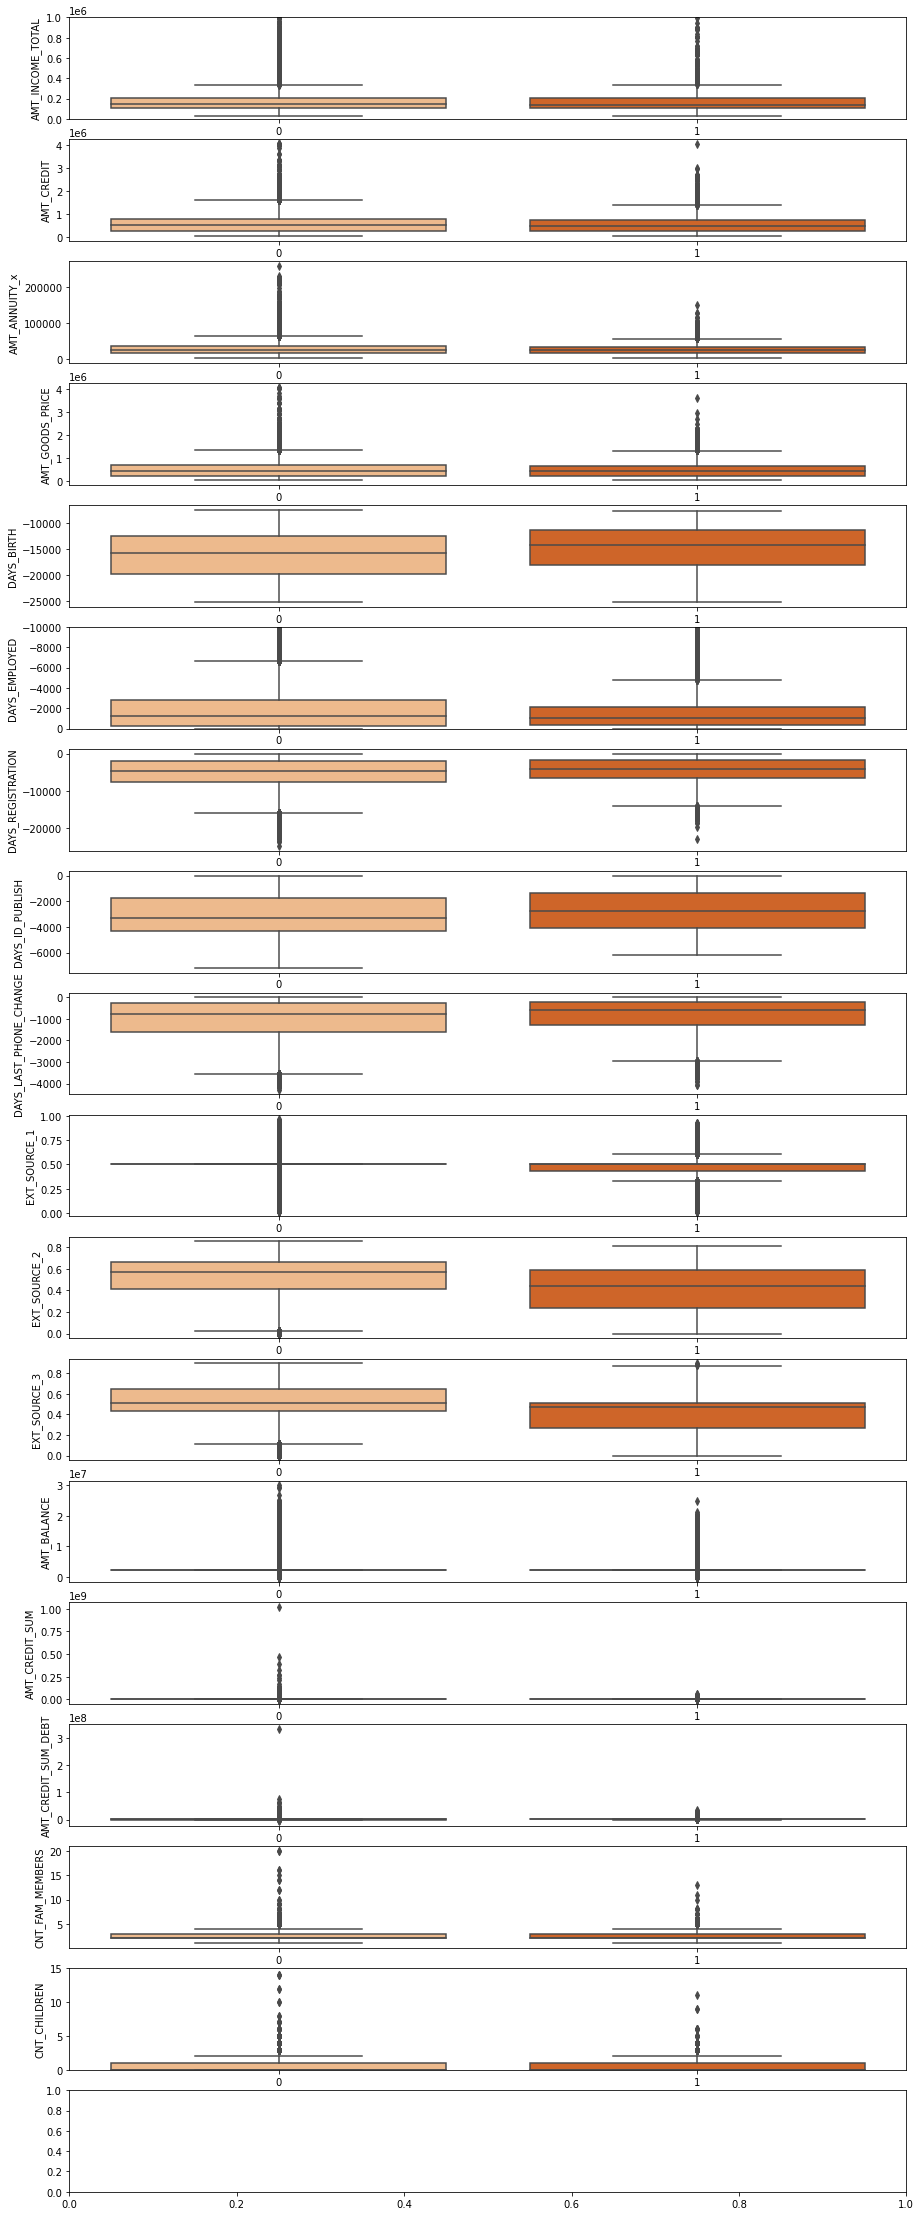

In [109]:
# 2. Moving to next method of Identifing Outliers by ploting boxplot and capturing values of outliers in data

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, QuantileTransformer
from sklearn.feature_selection import SelectKBest, f_classif

fig, axes = plt.subplots(nrows=18,ncols=1)
fig.set_size_inches(15, 40)
#plt.ylim(0,5000000);

ax=sb.boxplot(data=df,y="AMT_INCOME_TOTAL",x="TARGET",orient="v",ax=axes[0], palette="Oranges")
ax.set(ylim=(0, 1000000))
sb.boxplot(data=df,y="AMT_CREDIT",x="TARGET",orient="v",ax=axes[1], palette="Oranges")
#ax.set(ylim=(0, 1000000))
sb.boxplot(data=df,y="AMT_ANNUITY_x",x="TARGET",orient="v",ax=axes[2], palette="Oranges")
sb.boxplot(data=df,y="AMT_GOODS_PRICE",x="TARGET",orient="v",ax=axes[3], palette="Oranges")
sb.boxplot(data=df,y="DAYS_BIRTH",x="TARGET",orient="v",ax=axes[4], palette="Oranges")
ax=sb.boxplot(data=df,y="DAYS_EMPLOYED",x="TARGET",orient="v",ax=axes[5], palette="Oranges")
ax.set(ylim=(0, -10000))
sb.boxplot(data=df,y="DAYS_REGISTRATION",x="TARGET",orient="v",ax=axes[6], palette="Oranges")
sb.boxplot(data=df,y="DAYS_ID_PUBLISH",x="TARGET",orient="v",ax=axes[7], palette="Oranges")
sb.boxplot(data=df,y="DAYS_LAST_PHONE_CHANGE",x="TARGET",orient="v",ax=axes[8], palette="Oranges")
sb.boxplot(data=df,y="EXT_SOURCE_1",x="TARGET",orient="v",ax=axes[9], palette="Oranges")
sb.boxplot(data=df,y="EXT_SOURCE_2",x="TARGET",orient="v",ax=axes[10], palette="Oranges")
sb.boxplot(data=df,y="EXT_SOURCE_3",x="TARGET",orient="v",ax=axes[11], palette="Oranges")
sb.boxplot(data=df,y="AMT_BALANCE",x="TARGET",orient="v",ax=axes[12], palette="Oranges")
sb.boxplot(data=df,y="AMT_CREDIT_SUM",x="TARGET",orient="v",ax=axes[13], palette="Oranges")
sb.boxplot(data=df,y="AMT_CREDIT_SUM_DEBT",x="TARGET",orient="v",ax=axes[14], palette="Oranges")
sb.boxplot(data=df,y="CNT_FAM_MEMBERS",x="TARGET",orient="v",ax=axes[15], palette="Oranges")
ax=sb.boxplot(data=df,y="CNT_CHILDREN",x="TARGET",orient="v",ax=axes[16], palette="Oranges")
ax.set(ylim=(0, 15))


In [110]:
#Removig outliers. Its important to note that not all outliers are to be removed. Removing only those which you find relevant

df=df[df['EXT_SOURCE_3']> 0.1]
df=df[df['DAYS_REGISTRATION']> -25000]
#df=df[df['DAYS_EMPLOYED']> -3000]
df=df[df['DAYS_LAST_PHONE_CHANGE']> -3000]
df=df[df['CNT_FAM_MEMBERS'] <15]

### Log Transformation

In [151]:
# Perfoming log transformation on data. This needs non negetive values hence taking absolute values of the dataframe
print(df)
df_abs = df.abs()
print(df_abs)
data_log = np.log(df_abs)
data_log.head(10)

        TARGET  DAYS_ID_PUBLISH  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0            1            -2120       -9461           -637            -3648.0   
1            0             -291      -16765          -1188            -1186.0   
2            0            -2531      -19046           -225            -4260.0   
3            0            -2437      -19005          -3039            -9833.0   
4            0            -3458      -19932          -3038            -4311.0   
...        ...              ...         ...            ...                ...   
307506       0            -1982       -9327           -236            -8456.0   
307507       0            -4090      -20775         365243            -4388.0   
307508       0            -5150      -14966          -7921            -6737.0   
307509       1             -931      -11961          -4786            -2562.0   
307510       0             -410      -16856          -1262            -5128.0   

        DAYS_LAST_PHONE_CHA

,TARGET,DAYS_ID_PUBLISH,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,AMT_ANNUITY_x,AMT_BALANCE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,CNT_FAM_MEMBERS,CNT_CHILDREN
0,0.0,7.659171,9.154933,6.456770,8.201934,7.033506,-2.488469,-1.335797,-1.970582,12.218495,12.915579,12.768542,10.114579,14.601326,13.670549,12.412196,0.000000,NaN
1,NaN,5.673323,9.727049,7.080026,7.078342,6.719013,-1.167103,-0.474420,-0.671674,12.506177,14.072864,13.937286,10.482864,14.601326,13.832761,NaN,0.693147,NaN
2,NaN,7.836370,9.854612,5.416100,8.357024,6.703188,-0.688897,-0.587145,-0.315304,11.119883,11.813030,11.813030,8.817298,14.601326,12.149702,NaN,0.000000,NaN
3,NaN,7.798523,9.852457,8.019284,9.193499,6.424869,-0.688897,-0.430104,-0.671674,11.813030,12.652944,12.601487,10.298448,NaN,14.486313,13.370239,0.693147,NaN
4,NaN,8.148446,9.900082,8.018955,8.368925,7.008505,-0.688897,-1.130914,-0.671674,11.707670,13.148031,13.148031,9.992665,14.601326,11.893073,NaN,0.000000,NaN
5,NaN,6.167516,9.737492,7.370231,8.511175,7.838343,-0.688897,-1.037824,-0.476060,11.502875,13.103171,13.026953,10.222577,14.601326,13.057175,12.388632,0.693147,NaN
6,NaN,6.428105,9.530828,8.048788,7.100852,7.353722,-0.255200,-0.322964,-0.709154,12.049419,14.260662,14.148405,10.628642,14.601326,15.384296,13.890014,1.098612,0.0
7,NaN,7.774436,9.844268,6.107023,8.433159,6.975414,-0.688897,-0.336481,-0.614975,12.793859,14.240778,14.240778,10.647209,14.601326,13.805460,12.759979,0.693147,NaN
8,NaN,8.164510,9.908425,12.808318,8.912877,NaN,-0.532162,-1.581107,-0.285386,11.630709,13.834931,13.725039,10.429000,15.209693,12.983626,NaN,0.693147,NaN
9,NaN,8.292048,9.579764,7.610358,9.577550,7.422374,-0.688897,-0.292167,-0.671674,11.813030,12.911642,12.911642,9.915910,14.601326,14.486313,13.370239,0.000000,NaN


In [152]:
pd.set_option('mode.use_inf_as_na', True)
nan_cols = [i for i in data_log.columns if data_log[i].isnull().any()]
print("No. of columns containing null values")
print(len(data_log.columns[data_log.isna().any()]))
print((data_log.columns[data_log.isna().any()]))

No. of columns containing null values
9
Index(['TARGET', 'DAYS_ID_PUBLISH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_BALANCE', 'AMT_CREDIT_SUM',
       'AMT_CREDIT_SUM_DEBT', 'CNT_CHILDREN'],
      dtype='object')


In [153]:
# Filling NAN value with mean
data_log['DAYS_ID_PUBLISH'].fillna((df['DAYS_ID_PUBLISH'].mean()), inplace=True)
data_log['DAYS_EMPLOYED'].fillna((df['DAYS_EMPLOYED'].mean()), inplace=True)
data_log['DAYS_REGISTRATION'].fillna((df['DAYS_REGISTRATION'].mean()), inplace=True)
data_log['DAYS_LAST_PHONE_CHANGE'].fillna((df['DAYS_LAST_PHONE_CHANGE'].mean()), inplace=True)
data_log['AMT_BALANCE'].fillna((df['AMT_BALANCE'].mean()), inplace=True)
data_log['AMT_CREDIT_SUM'].fillna((df['AMT_CREDIT_SUM'].mean()), inplace=True)
data_log['AMT_CREDIT_SUM_DEBT'].fillna((df['AMT_CREDIT_SUM_DEBT'].mean()), inplace=True)
data_log['CNT_CHILDREN'].fillna((df['CNT_CHILDREN'].mean()), inplace=True)
data_log['TARGET']=data_log['TARGET'].replace(0.0, 1)
data_log['TARGET']=data_log['TARGET'].fillna(0)
data_log.head(10)

,TARGET,DAYS_ID_PUBLISH,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,AMT_ANNUITY_x,AMT_BALANCE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,CNT_FAM_MEMBERS,CNT_CHILDREN
0,1.0,7.659171,9.154933,6.456770,8.201934,7.033506,-2.488469,-1.335797,-1.970582,12.218495,12.915579,12.768542,10.114579,1.460133e+01,13.670549,12.412196,0.000000,0.416265
1,0.0,5.673323,9.727049,7.080026,7.078342,6.719013,-1.167103,-0.474420,-0.671674,12.506177,14.072864,13.937286,10.482864,1.460133e+01,13.832761,630017.010050,0.693147,0.416265
2,0.0,7.836370,9.854612,5.416100,8.357024,6.703188,-0.688897,-0.587145,-0.315304,11.119883,11.813030,11.813030,8.817298,1.460133e+01,12.149702,630017.010050,0.000000,0.416265
3,0.0,7.798523,9.852457,8.019284,9.193499,6.424869,-0.688897,-0.430104,-0.671674,11.813030,12.652944,12.601487,10.298448,2.186510e+06,14.486313,13.370239,0.693147,0.416265
4,0.0,8.148446,9.900082,8.018955,8.368925,7.008505,-0.688897,-1.130914,-0.671674,11.707670,13.148031,13.148031,9.992665,1.460133e+01,11.893073,630017.010050,0.000000,0.416265
5,0.0,6.167516,9.737492,7.370231,8.511175,7.838343,-0.688897,-1.037824,-0.476060,11.502875,13.103171,13.026953,10.222577,1.460133e+01,13.057175,12.388632,0.693147,0.416265
6,0.0,6.428105,9.530828,8.048788,7.100852,7.353722,-0.255200,-0.322964,-0.709154,12.049419,14.260662,14.148405,10.628642,1.460133e+01,15.384296,13.890014,1.098612,0.000000
7,0.0,7.774436,9.844268,6.107023,8.433159,6.975414,-0.688897,-0.336481,-0.614975,12.793859,14.240778,14.240778,10.647209,1.460133e+01,13.805460,12.759979,0.693147,0.416265
8,0.0,8.164510,9.908425,12.808318,8.912877,-929.046806,-0.532162,-1.581107,-0.285386,11.630709,13.834931,13.725039,10.429000,1.520969e+01,12.983626,630017.010050,0.693147,0.416265
9,0.0,8.292048,9.579764,7.610358,9.577550,7.422374,-0.688897,-0.292167,-0.671674,11.813030,12.911642,12.911642,9.915910,1.460133e+01,14.486313,13.370239,0.000000,0.416265


### Scaling

In [154]:
data_x=data_log.iloc[:,1:]
#print(data_x)
standard_scaler = StandardScaler()
df_FeatureEng =  StandardScaler().fit_transform(data_x) 
df_FeatureEng = normalize(df_FeatureEng)
df_FeatureEng=pd.DataFrame(df_FeatureEng, columns=data_x.columns)
#XData['AMT_INCOME_TOTAL'] = standard_scaler.fit_transform(XData[['AMT_INCOME_TOTAL']])
df_FeatureEng.head(5)

,DAYS_ID_PUBLISH,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,AMT_ANNUITY_x,AMT_BALANCE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,CNT_FAM_MEMBERS,CNT_CHILDREN
0,0.000504,-0.267881,-0.002128,0.002739,0.059181,-0.764390,-0.124152,-0.489421,0.099975,-0.033280,-0.041500,0.014014,-0.048809,-0.009356,-0.090893,-0.245978,0.035053
1,-0.026249,0.087794,-0.002995,0.001106,0.114338,-0.361935,0.146035,0.039383,0.371518,0.424026,0.412940,0.230860,-0.094553,-0.018124,0.518650,0.011331,0.067904
2,0.002467,0.161529,-0.004346,0.004262,0.082781,0.031121,0.069115,0.224697,-0.351544,-0.383673,-0.350263,-0.499936,-0.068466,-0.013127,0.375553,-0.345040,0.049169
3,0.002710,0.207240,-0.001218,0.008459,0.107050,0.040341,0.155738,0.036966,-0.053489,-0.164569,-0.141647,0.120944,0.906559,-0.017010,-0.165271,0.010635,0.063736
4,0.009560,0.337470,-0.001614,0.007377,0.142578,0.053462,-0.184804,0.048989,-0.151908,0.041856,0.099252,-0.050113,-0.117616,-0.022551,0.645154,-0.592737,0.084467


# 4. Algorithm Selection

###### In this section I have applied supervised learning technique. A model is trained from  training data and make predictions about test or future data. A data set is split into training and test sets. During the training, we give the algorithm a dataset that contains correct answers (label y). Then, we validate the model accuracy with a test data set by comparing model predicted outcome vs expected outcome. We look for AUC score to check model accuracy

###### Create Training and Test Datasets using Dataframe generated from performing Feature Engineering 

In [273]:
from sklearn.model_selection import train_test_split
X=data_log.iloc[:,1:]
Y=data_log.iloc[:,0].values.astype(int)
standard_scaler = StandardScaler()
X_scaled =  StandardScaler().fit_transform(X) 
X_scalednorm = normalize(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_scalednorm, Y, test_size=0.33, random_state=0)
print(X_scalednorm)

[[ 5.04389056e-04 -2.67881474e-01 -2.12751547e-03 ... -9.08932508e-02
  -2.45978105e-01  3.50525223e-02]
 [-2.62491909e-02  8.77936112e-02 -2.99489211e-03 ...  5.18649824e-01
   1.13305047e-02  6.79040564e-02]
 [ 2.46665656e-03  1.61529249e-01 -4.34637568e-03 ...  3.75553034e-01
  -3.45040391e-01  4.91691567e-02]
 ...
 [ 1.41781608e-02 -3.51465294e-02  4.68529117e-04 ... -1.89902020e-01
  -5.13925076e-01  7.32356652e-02]
 [-1.50287608e-02 -3.94169688e-01 -6.94550072e-04 ...  7.56385274e-01
   1.65241104e-02  9.90294915e-02]
 [-1.66082416e-02  7.20892741e-02 -2.22405508e-03 ... -1.35706919e-01
   8.73269213e-03  5.23352871e-02]]


## 1. Random Forest Classifier - 
###### I am using Random Forest classifier as Supervised ML model.  Random forest classifier creates a set of decision trees from a randomly selected subset of the training set and then It collects the votes from different decision trees to decide the final prediction

Accuracy of random forest tree: 0.9210579940498024


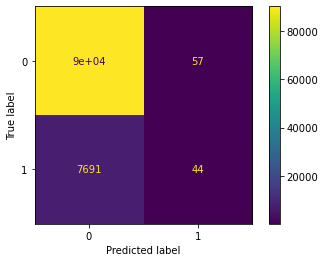

In [158]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix


RanClf=RandomForestClassifier(n_estimators=100)
#y_train=y_train.reshape(-1,1)
RanClf.fit(X_train,y_train)
from sklearn import metrics
y_ranclfpred=RanClf.predict(X_test)
print("Accuracy of random forest tree:",metrics.accuracy_score(y_test, y_ranclfpred))
plot_confusion_matrix(RanClf, X_test, y_test)
plt.show()

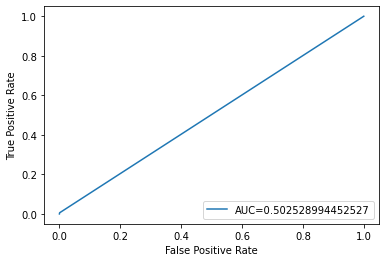

In [159]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_ranclfpred)
auc = metrics.roc_auc_score(y_test, y_ranclfpred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

###### AUC value of Random Forest Classifier model is 0.5 and though its able to predict 0's precisely, its showing poor results on predicting 1's. Note that this mode is trained on all the rows for selected features from datasets

## 2 . Gradient Boosting Classifier -
##### This is a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. In Gradient Boosting, each predictor tries to improve on its predecessor by reducing the errors. it fits a new predictor to the residual errors made by the previous predictor.

Accuracy of decision tree: 0.9211395036067979


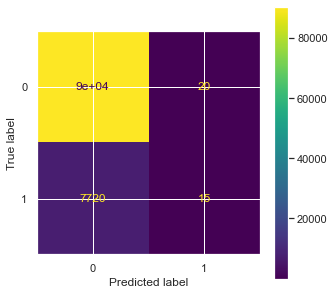

In [274]:

#train with gradient boosting algorithm
gb = GradientBoostingClassifier(random_state = 0)
gb.fit(X_train,y_train)
#gb.score(X_train,y_train).round(2)
y_gb_pred=gb.predict(X_test)
print("Accuracy of decision tree:",metrics.accuracy_score(y_test, y_gb_pred))
plot_confusion_matrix(gb, X_test, y_test)
plt.show()

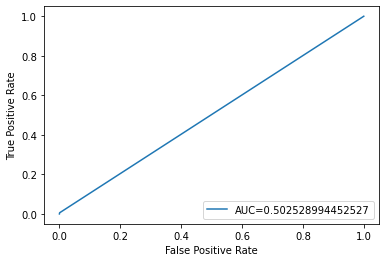

In [161]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_ranclfpred)
auc = metrics.roc_auc_score(y_test, y_ranclfpred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

###### AUC value of Gradient Boosting Classifier model is 0.5 and though its able to predict 0's precisely, its showing poor results on predicting 1's. Note that this mode is trained on all the rows for selected features from datasets

## Underfitting - Adjusting the size of dataframe by having equal amount of 0's and 1's in dataset

In [170]:
Target1 = data_log.loc[data_log['TARGET'] == 1]
Numberofones=Target1.shape
print(Numberofones)
# select rows with number of zeros equal to number of one
Target0 = data_log.loc[data_log['TARGET'] == 0].sample(Numberofones[0])
# combine the dataframes
UnderfitDf = pd.concat([Target1, Target0], axis=0)
UnderfitDf.shape

(23212, 18)


(46424, 18)

###### Selecting Training and Test Data from Underfitted Dataframe

In [177]:
X = UnderfitDf.iloc[:,1:].values.astype(float)
Y = UnderfitDf.iloc[:,0].values.astype(int)
standard_scaler = StandardScaler()
X_scaled =  StandardScaler().fit_transform(X) 
X_scalednorm = normalize(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_scalednorm, Y, test_size=0.33, random_state=0)

## 3. Gradient Boosting Classifier ( With underfitted data for selected top features)

Accuracy of decision tree: 0.6661879895561358


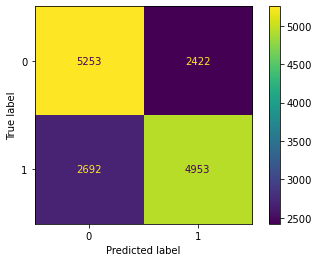

In [178]:
#train with gradient boosting algorithm
gb_under = GradientBoostingClassifier(random_state = 0)
#y_train=y_train.reshape(-1,1)
gb_under.fit(X_train,y_train)
#gb.score(X_train,y_train).round(2)
y_gb_under_pred=gb_under.predict(X_test)
print("Accuracy of decision tree:",metrics.accuracy_score(y_test, y_gb_under_pred))
plot_confusion_matrix(gb_under, X_test, y_test)
plt.show()

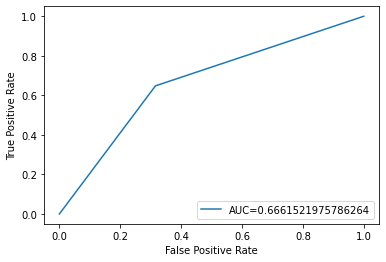

In [179]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_gb_under_pred)
auc = metrics.roc_auc_score(y_test, y_gb_under_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

###### AUC score is increased to 0.66 with Gradient Boosting Classifier

## 4. Naive Bayes- 
 It is  supervised machine learning classification algorithms based on the Bayes theorem. Clasifier assume that the value of a particular feature is independent of the value of any other feature. 

Accuracy of Decision tree: 0.6275456919060052


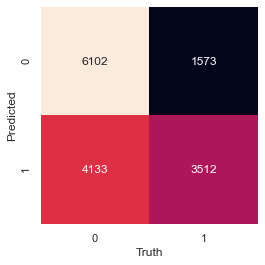

In [183]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

Gaumodel = GaussianNB()
Gaumodel.fit(X_train, y_train)
y_pred = Gaumodel.predict(X_test)
mat = confusion_matrix(y_test,y_pred)
names = np.unique(y_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')
print("Accuracy of Decision tree:",metrics.accuracy_score(y_test, y_pred))

###### AUC score is increased to 0.62 with GaussianNB algorithm

## 5. Naive Bayers as input to Gradient Boosting Classifier Model

Accuracy of decision tree: 0.6557441253263707


Text(89.18, 0.5, 'Predicted')

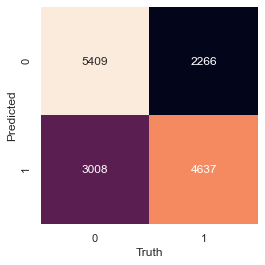

In [186]:
#train with gradient boosting algorithm
gb_under_nb = GradientBoostingClassifier(random_state = 0, init = Gaumodel)
#y_train=y_train.reshape(-1,1)
gb_under_nb.fit(X_train,y_train)
#gb.score(X_train,y_train).round(2)
y_gb_under_nb_pred=gb_under_nb.predict(X_test)
print("Accuracy of decision tree:",metrics.accuracy_score(y_test, y_gb_under_nb_pred))
mat = confusion_matrix(y_test,y_gb_under_nb_pred)
names = np.unique(y_gb_under_nb_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

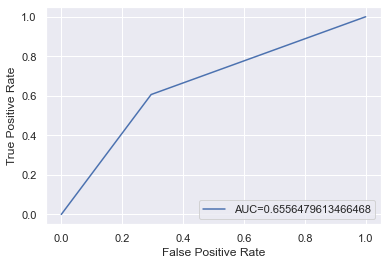

In [187]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_gb_under_nb_pred)
auc = metrics.roc_auc_score(y_test, y_gb_under_nb_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

##### Prediction accuracy increased to 0.656 with GaussianNB and Gradient Boosting Classifier Model applied together

In [191]:
!pip install xgboost

## 6. XGBoostClassifier - 
###### It is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. This algorithm provides features such as Parallelization, Prining and Harware Optimiziation and provides optimized results

In [210]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
m2_xgb = xgb.XGBClassifier(n_estimators=110, nthread=-1, max_depth = 3, seed=1729)
m2_xgb.fit(X_train, y_train, eval_metric="auc", verbose = False, eval_set=[(X_test, y_test)])
y_xgb = m2_xgb.predict(X_test)
mean_squared_error(y_test, y_xgb)

0.3343342036553525

Text(89.18, 0.5, 'Predicted')

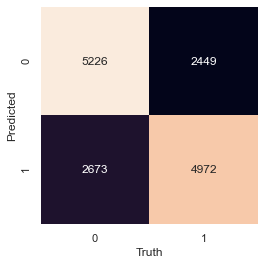

In [211]:
#print("Accuracy of decision tree:",metrics.accuracy_score(y_test, y_xgb))
mat = confusion_matrix(y_test,y_xgb)
names = np.unique(y_xgb)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

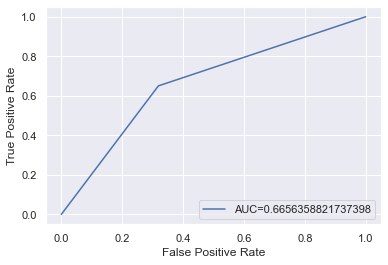

In [212]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_xgb)
auc = metrics.roc_auc_score(y_test, y_xgb)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

###### With XGboost the AUC value is increased to 0.665

## Select XGBRegessor to evaluate F values of selected features

In [224]:
#xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
#                max_depth = 3, alpha = 10, n_estimators = 100)
xg_reg = xgb.XGBRegressor(n_estimators=100, reg_lambda=1, gamma=0, max_depth=3)

xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.461216


        TARGET  DAYS_ID_PUBLISH  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0          1.0         7.659171    9.154933       6.456770           8.201934   
26         1.0         7.510431    9.837561       7.873978           8.790726   
40         1.0         6.936343    9.768927       7.140453           7.074963   
42         1.0         8.391403    9.501815       8.187855           3.806662   
81         1.0         8.342602   10.118357      12.808318           8.592486   
...        ...              ...         ...            ...                ...   
274602     0.0         8.444838    9.973993      12.808318           6.575076   
303494     0.0         8.093157    9.888831       8.042056           8.030735   
268596     0.0         7.934155    9.876116      12.808318           8.700015   
116739     0.0         7.172425    9.363576       5.866468           8.661640   
143500     0.0         8.186186    9.983038      12.808318           9.427466   

        DAYS_LAST_PHONE_CHA

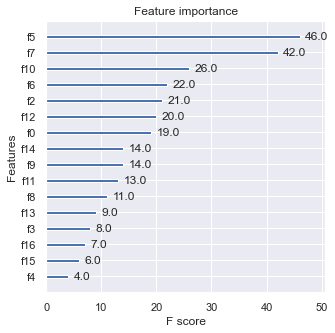

In [228]:
import matplotlib.pyplot as plt
data_dmatrix = xgb.DMatrix(data=X_scalednorm,label=Y)
print(UnderfitDf)
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

###### Create dataframe with higher f-score features

In [260]:
Newdf=UnderfitDf.iloc[:,[6,8,11,7,3,13,1,15,10,12,9,14,4,17]]
X_Select = UnderfitDf.iloc[:,[6,8,11,7,3,13,1,15,10,12,9,14,4,17]].values.astype(float)
Y_Select = UnderfitDf.iloc[:,0].values.astype(int)
standard_scaler = StandardScaler()
X_scaled =  StandardScaler().fit_transform(X_Select) 
X_scalednorm = normalize(X_scaled)
X_trains, X_tests, y_trains, y_tests = train_test_split(X_scalednorm, Y_Select, test_size=0.33, random_state=0)
Newdf.head(10)

,EXT_SOURCE_1,EXT_SOURCE_3,AMT_GOODS_PRICE,EXT_SOURCE_2,DAYS_EMPLOYED,AMT_BALANCE,DAYS_ID_PUBLISH,AMT_CREDIT_SUM_DEBT,AMT_CREDIT,AMT_ANNUITY_x,AMT_INCOME_TOTAL,AMT_CREDIT_SUM,DAYS_REGISTRATION,CNT_CHILDREN
0,-2.488469,-1.970582,12.768542,-1.335797,6.456770,1.460133e+01,7.659171,12.412196,12.915579,10.114579,12.218495,13.670549,8.201934,0.416265
26,-0.688897,-1.657023,13.461689,-0.600610,7.873978,1.460133e+01,7.510431,13.933294,13.795300,10.206421,11.630709,15.194441,8.790726,0.416265
40,-0.688897,-1.138924,13.658857,-1.181427,7.140453,2.186510e+06,6.936343,14.985034,13.992468,10.463903,12.218495,16.069707,7.074963,0.416265
42,-0.758843,-0.917102,12.382125,-0.394224,8.187855,1.334772e+01,8.391403,13.222105,12.573742,9.696371,11.813030,13.655046,3.806662,0.416265
81,-0.688897,-0.327194,12.437184,-3.731688,12.808318,1.460133e+01,8.342602,630017.010050,12.437184,9.588332,11.302204,11.091483,8.592486,0.416265
110,-0.688897,-2.114936,13.279367,-1.265602,5.587249,1.460133e+01,8.067776,11.960703,13.492541,10.335351,11.967181,12.323856,5.958425,0.000000
138,-1.138429,-1.239216,13.422468,-0.458927,5.298317,1.460133e+01,4.736198,12.825043,13.422468,10.511812,12.586220,12.830673,8.563886,0.416265
154,-0.688897,-0.812798,12.022751,-1.702807,8.945854,2.186510e+06,6.986566,630017.010050,12.411537,9.446795,11.967181,14.605507,6.651572,0.416265
163,-0.688897,-0.666128,12.323856,-2.450471,5.010635,1.460133e+01,6.470800,11.338558,12.323856,9.954062,11.625495,11.813030,7.851661,0.416265
180,-0.688897,-0.680262,13.199324,-0.988565,6.945051,1.460133e+01,6.674561,12.248679,13.199324,10.203592,12.100712,12.742566,6.661855,1.098612


## 7. XGBClassifier on the selected features with higher f-values

Text(25.1, 0.5, 'Predicted')

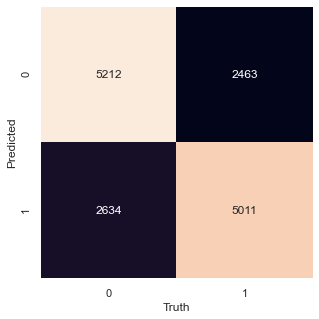

In [261]:
m3_xgb = xgb.XGBClassifier(n_estimators=110, nthread=-1, max_depth = 3, seed=1729, gamma=0)
m3_xgb.fit(X_trains, y_trains, eval_metric="auc", verbose = False, eval_set=[(X_tests, y_tests)])
y_xgb_filter = m3_xgb.predict(X_tests)
mean_squared_error(y_tests, y_xgb_filter)
#print("Accuracy of decision tree:",metrics.accuracy_score(y_test, y_xgb))
mat = confusion_matrix(y_tests,y_xgb_filter)
names = np.unique(y_xgb_filter)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

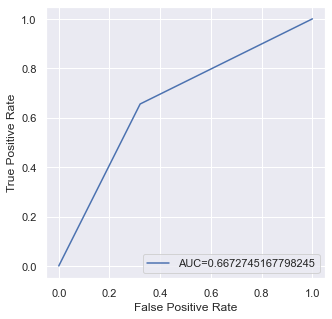

In [269]:
fpr, tpr, _ = metrics.roc_curve(y_tests,  y_xgb_filter)
auc = metrics.roc_auc_score(y_tests, y_xgb_filter)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

##### AUC value of XGBoostClassifier model is increased to 0.667 by selecting features of higher f-value

# 5. Comparing performance and Recommendation

### Comparison among GradientBoostingClassifier, GaussianNB, XGBoostClassifier based on the AUC values
##### AUC score with Gradient Boosting Classifier - 0.666
##### AUC score with GaussianNB algorithm - 0.627
##### AUC score using GaussianNB as input to Gradient Boosting Classifier algorithm -  0.656
##### AUC score with XGBoostClassifier - 0.665
##### AUC score with XGBoostClassifier(higher f-value features) - 0.667

### Recommendation - 
###### Result analysis shows that XGBoostClassifier and Gradient Boosting Classifier provides comparable AUC values however the it took very less time to execute XGBoostClassifier compare to other models. XGBoost model has the best combination of prediction performance and processing time compared to other algorithms and hence my recommendation will be to use  XGBoostClassifier with given dataset